## Census Income

### Project Description

This data was extracted from the 1994 Census bureau database (https://www.census.gov/en.html) by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). **The prediction task is to determine whether a person makes over $50K a year.**

#### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


### Dataset Link

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


From above we can observe a combination of numeric and categorical data.<br>
The target variable is Income which has values <=50K or >50K. Hence, this is a classification task.

### Exploratory Data Analysis

In [3]:
# Getting dimensions od the dataset
df.shape

(32560, 15)

The dataset consists of 32560 rows and 15 columns, out of which 1 variable is the target or output variable.

In [4]:
# Getting the column names
df.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

The independent variables are:<br>
'Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country'

The target variable is:<br>
'Income'

In [5]:
# Checking datatype of each column
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The dataset has int64 and object datatypes, indicating numeric and string datatypes.

In [6]:
# Checking for missing values
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values in the dataset.

In [7]:
# Checking for duplicates
df.duplicated().sum()

24

There are 24 duplicates in the dataset. We need to remove the duplicates.

In [8]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(32536, 15)

After removing duplicates, the number of rows is now 32536.

In [10]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


From above, we can get an overview of the dataset. As observed before, there are no missing values. We need to check for any other special characters for object datatypes.

In [11]:
# Number of unique values for each variable
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

- From above it is clear that Workclass, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Native_country and Income (target) are categorical variables.<br>
- Age, Fnlwgt, Capital_gain, Capital_gain and Hours_per_week are numeric and continuous variables.

In [12]:
# Frequency of occurence of each value in 'Workclass' column
df.Workclass.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Workclass seems to be Private for majority of the people. We can also observe ? i.e., a special character and needs to be handles during data cleaning and preprocessing.

In [13]:
# Frequency of occurence of each value in 'Education' column
df.Education.value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

Most of the people are HS-grads.

In [14]:
# Frequency of occurence of each value in 'Education_num' column
df.Education_num.value_counts()

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64

Most people have Education_num values as 9. The values counts for Education and Education_num are the same. So we can drop either of the columns during preprocessing.

In [15]:
# Frequency of occurence of each value in 'Marital_status' column
df.Marital_status.value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

Most of the people have marital status as Married-civ-spouse or Never-married.

In [16]:
# Frequency of occurence of each value in 'Occupation' column
df.Occupation.value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

Most of the people have Occupation values as  Prof-specialty, Craft-repair or Exec-managerial. Occupation also seems to have a special character (?) which needs to be removed during preprocessing step.

In [17]:
# Frequency of occurence of each value in 'Relationship' column
df.Relationship.value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

The most frequently observed Relationship is Husband.

In [18]:
# Frequency of occurence of each value in 'Race' column
df.Race.value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Most of the people in the dataset are White.

In [19]:
# Frequency of occurence of each value in 'Sex' column
df.Sex.value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

There are almost twice the number of Males than Females.

In [20]:
# Frequency of occurence of each value in 'Native_country' column
df.Native_country.value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Majority of the people seem to be from the United States. The Native_country value also seems to have ? representing missing values and need to be handled during preprocessing.

In [21]:
# Frequency of occurence of each value in 'Income' column
df.Income.value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

There are many more people with income <=50K thant with >50K.

#### Dataset description

In [22]:
# Statistical summary of columns (numerical data)
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations from the statistical summary:
- The mean is slightly greater than median for Education_num, but we consider Education_num as 
- The mean is greater than the median for Age, Fnlwgt, Capital_gain, Capital_loss and Hours_per_week. So these variables are skewed to the right.
- Based on the 75% and max values, there seem to be outliers as well.

In [23]:
# Numeric columns for data visualisation
num_cols = df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]
num_cols.columns.to_list()

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

#### Data Preprocessing

Before proceeding to check for outliers and skewness, the missing values represented with '?' need to be filled.

Since all the variables with '?' values are categorical variables, the missing values should be filled with the most frequently occuring value or the mode.

In [24]:
cols = ['Workclass', 'Occupation', 'Native_country']
for col in cols:
    df[col] = df[col].replace(' ?', df[col].mode()[0])

In [25]:
# Frequency of occurence of each value in 'Workclass' column
df.Workclass.value_counts()

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [26]:
# Frequency of occurence of each value in 'Occupation' column
df.Occupation.value_counts()

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [27]:
# Frequency of occurence of each value in 'Native_country' column
df.Native_country.value_counts()

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

Now the '?' values have been removed.

#### Data Visualisation

In [28]:
# Setting uniform color palette
sns.set_palette(sns.color_palette("twilight"))

##### Univariate analysis

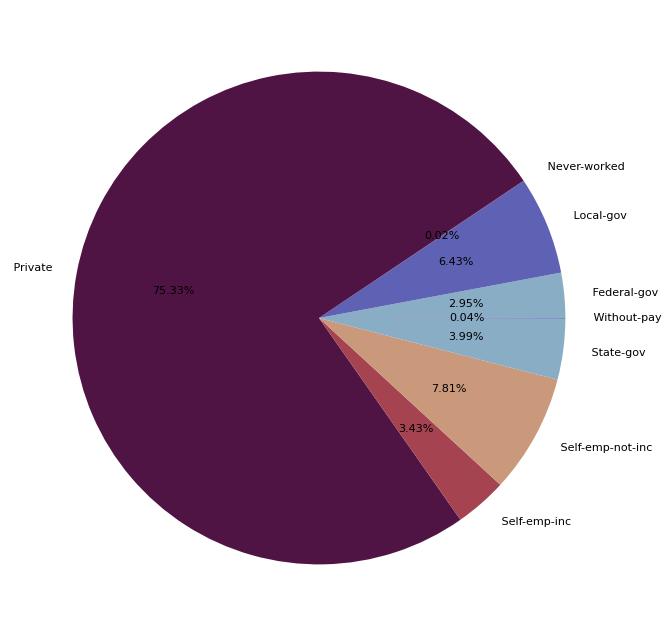

In [29]:
# Visualising the Workclass in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('twilight')

workclass = pd.DataFrame(df.Workclass.value_counts()).reset_index().sort_values(by='index')
  
plt.pie(workclass.Workclass, 
        labels=workclass['index'],
        colors=palette_color, 
        autopct='%.2f%%',
        textprops={'fontsize': 8})
plt.show()

75.33% of the people are employed in Private jobs.

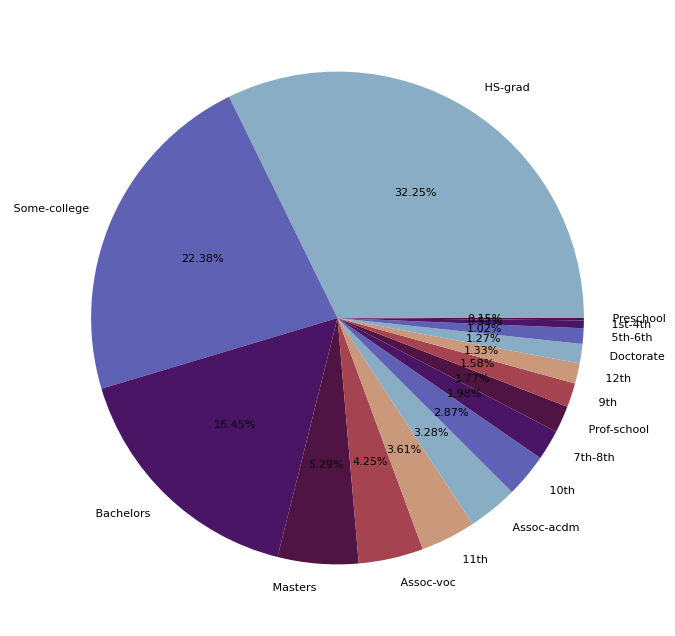

In [30]:
# Visualising the Education in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('twilight')
  
plt.pie(df.Education.value_counts(), 
        labels=df.Education.value_counts().index,
        colors=palette_color, 
        autopct='%.2f%%',
        textprops={'fontsize': 8})
plt.show()

Majority of the people (32.25%) are HS-grads, while only 0.15% are Preschool educated.

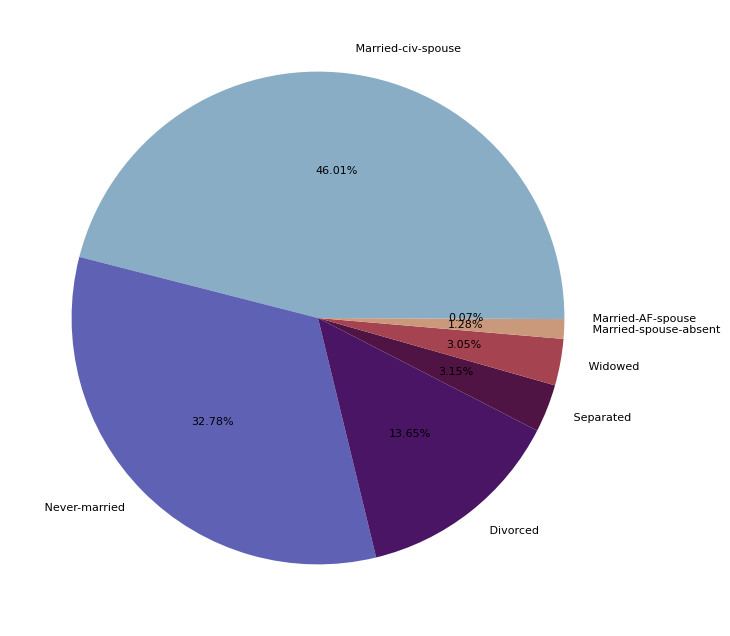

In [31]:
# Visualising the Marital_status in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('twilight')
  
plt.pie(df.Marital_status.value_counts(), 
        labels=df.Marital_status.value_counts().index,
        colors=palette_color, 
        autopct='%.2f%%',
        textprops={'fontsize': 8})
plt.show()

Majority of the people are Married-civ-spouse (46.01%) or Never-married (32.78%). Only 0.07% of the people are Married-AF-spouse.

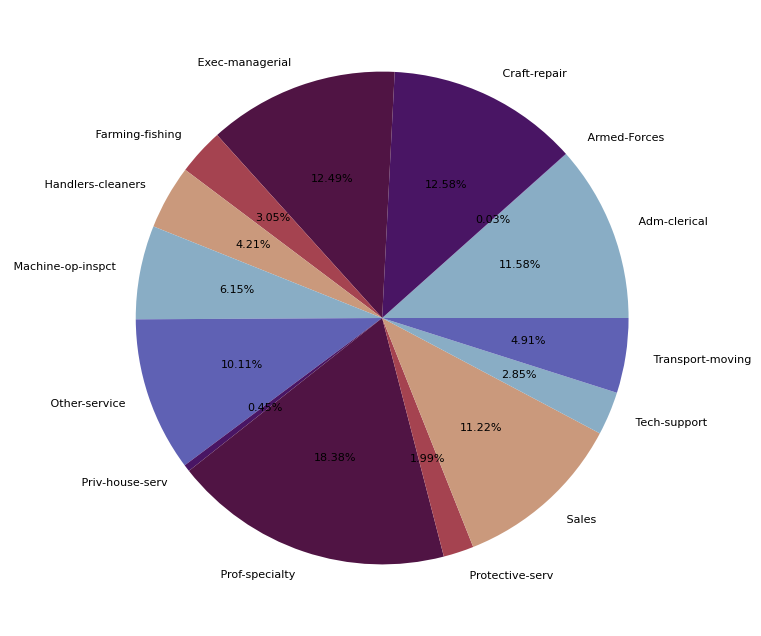

In [32]:
# Visualising the Occupation in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('twilight')

occupation = pd.DataFrame(df.Occupation.value_counts()).reset_index().sort_values(by='index')
  
plt.pie(occupation.Occupation, 
        labels=occupation['index'],
        colors=palette_color, 
        autopct='%.2f%%',
        textprops={'fontsize': 8})
plt.show()

Majority of the people have Occupation as Prof-specialty (18.38%), Craft-repair (12.58%) or Exec-manegarial (12.49%) while only 0.03% are employed in Armed-Forces.

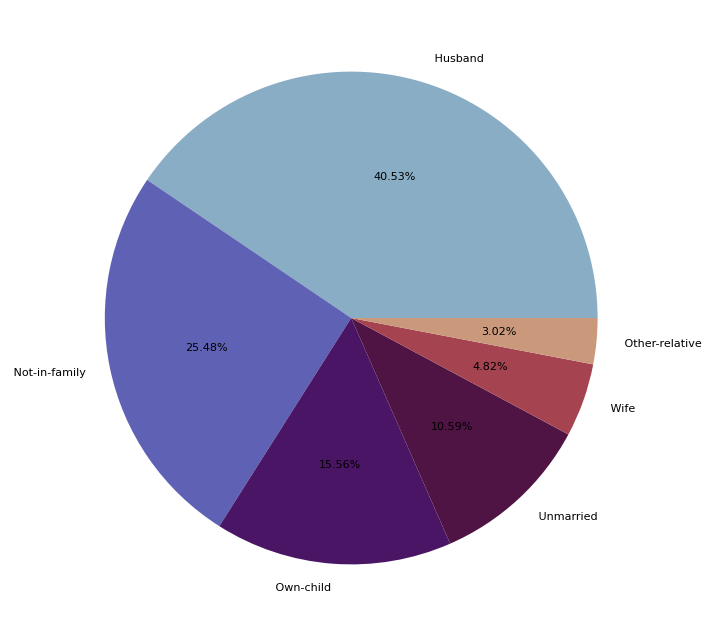

In [33]:
# Visualising the Relationship in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('twilight')
  
plt.pie(df.Relationship.value_counts(), 
        labels=df.Relationship.value_counts().index,
        colors=palette_color, 
        autopct='%.2f%%',
        textprops={'fontsize': 8})
plt.show()

Majority of the Relationship values observed are Husband.

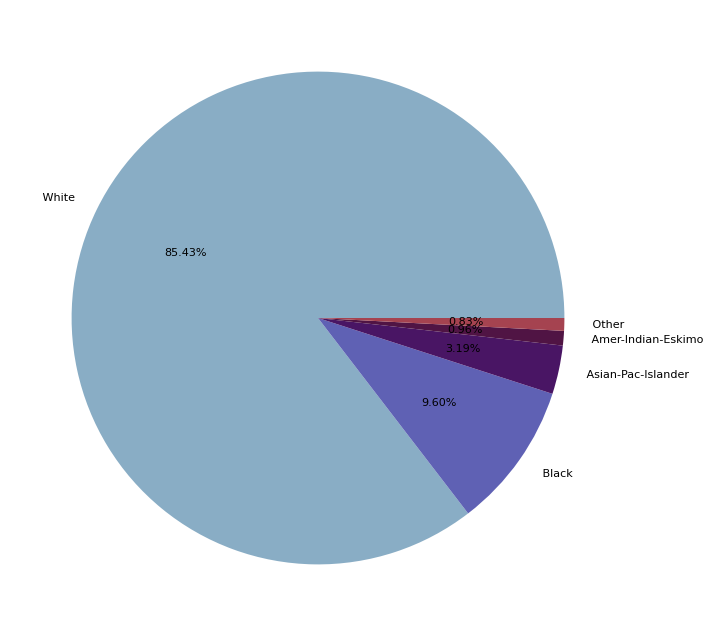

In [34]:
# Visualising the Race in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('twilight')
  
plt.pie(df.Race.value_counts(), 
        labels=df.Race.value_counts().index,
        colors=palette_color, 
        autopct='%.2f%%',
        textprops={'fontsize': 8})
plt.show()

Around 85.43% of the people are White, which represents the majority.

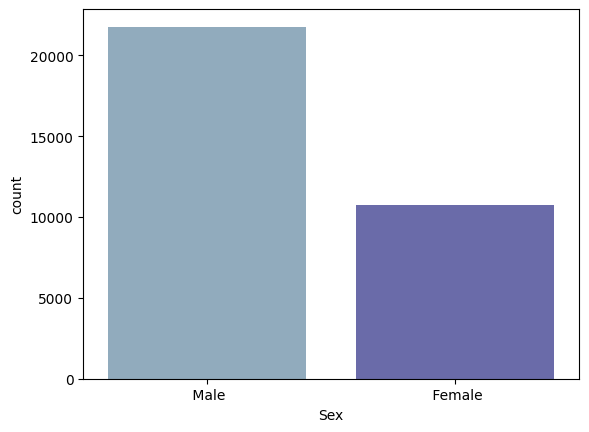

In [35]:
# Visualising the frequency of Sex in the dataset
sns.countplot(x=df.Sex)
plt.show()

There are almost twice the number of Males than Females.

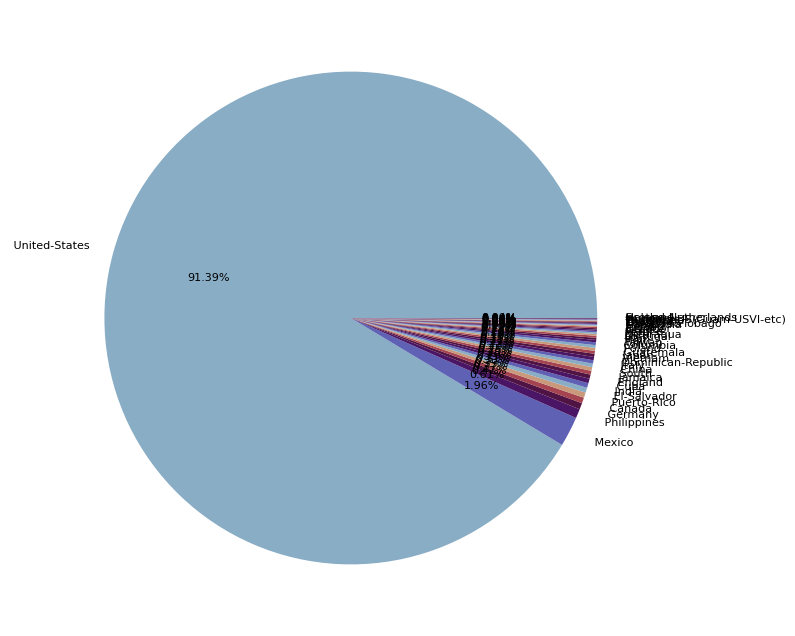

In [36]:
# Visualising the Native_country in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('twilight')
  
plt.pie(df.Native_country.value_counts(), 
        labels=df.Native_country.value_counts().index,
        colors=palette_color, 
        autopct='%.2f%%',
        textprops={'fontsize': 8})
plt.show()

Over 91% of the people are native to the United-States, 1.96% of the people are native to Mexico and the rest are divided between the 40 other countries.

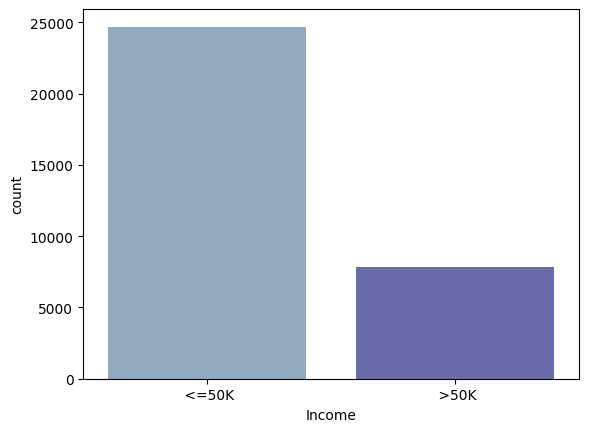

In [37]:
# Visualising the frequency of Income in the dataset
sns.countplot(x=df.Income)
plt.show()

There are almost thrice the number of people with annual income below or equal to 50K than with above 50K.

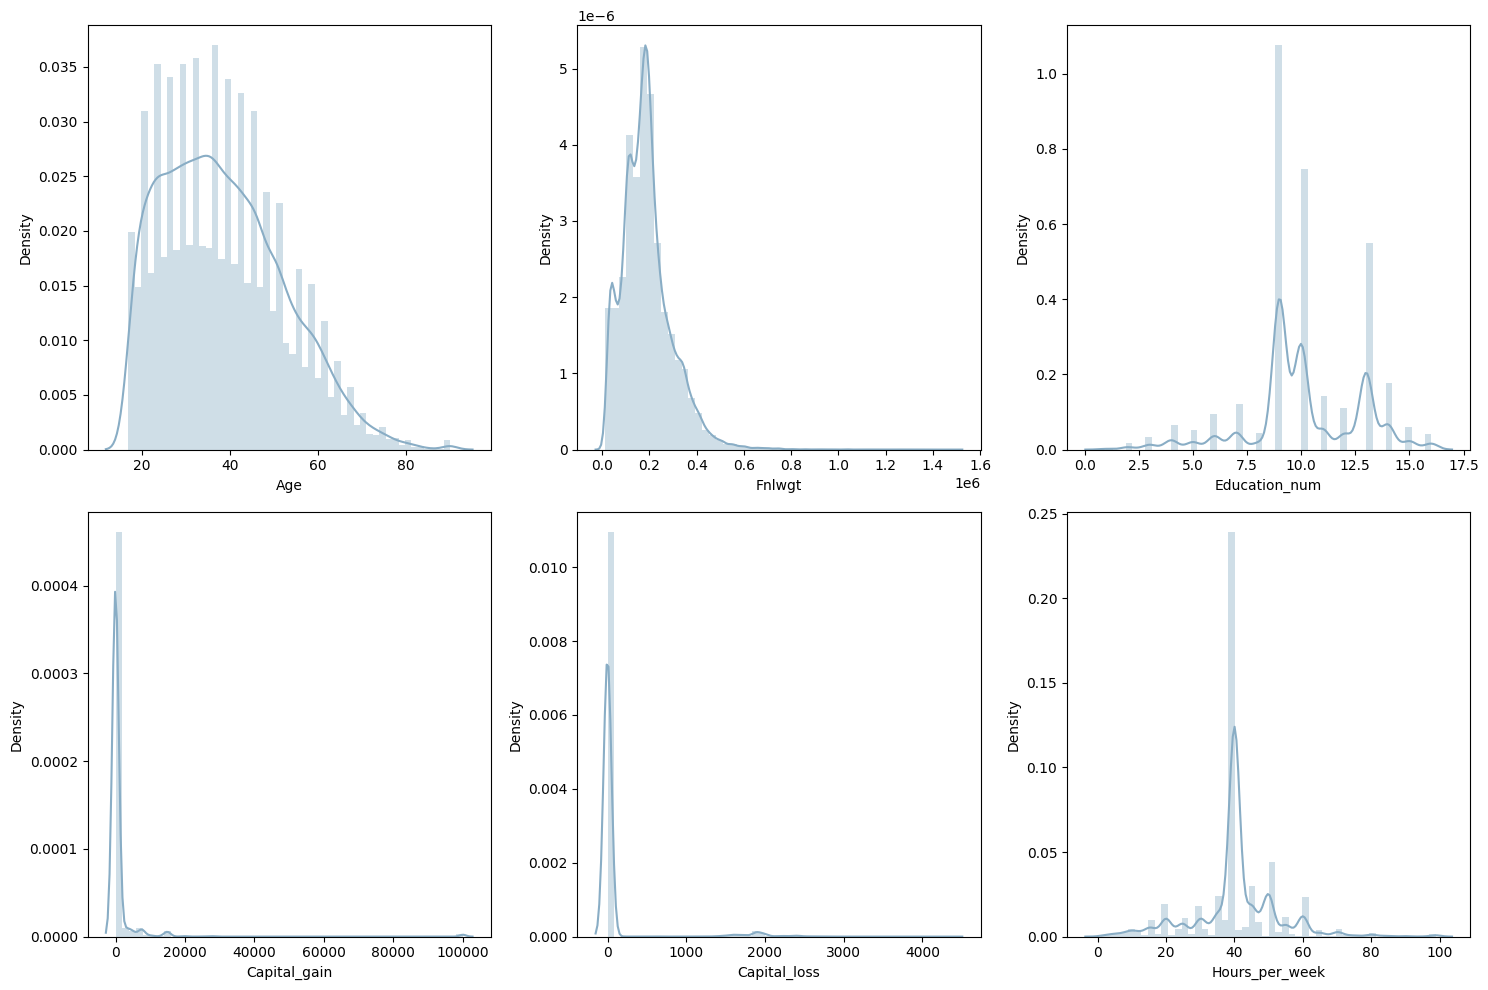

In [38]:
# Data distribution for numerical columns
plt.figure(figsize=(15, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 6:
        ax = plt.subplot(2, 3, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

From above we can observe that Fnlwgt, Capital_gain and Capital_loss are all highly skewed to the right.<br>
Age is slightly skewed to the right, and Hours_per_week seems to have an almost normal distribution.

##### Bivariate analysis

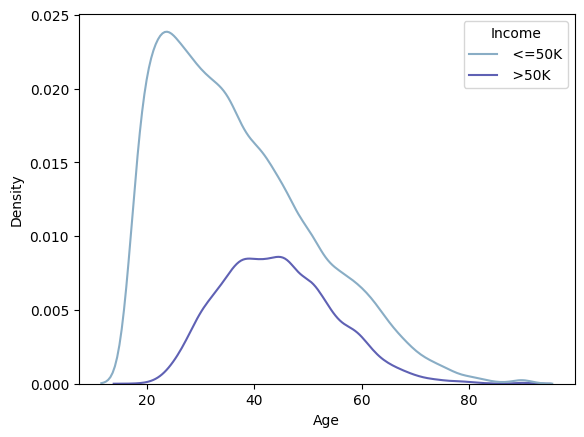

In [39]:
# Age vs Income
sns.kdeplot(x="Age", data=df, hue="Income")
plt.show()

The Age distribution for people with Income <=50K peaks at around 25, which indicates that the most frequently observed age of people earning below 50K per annum is around 25.<br>
On the other hand, most frequently observed age of people earning >50K per annum is between 40 to 45.

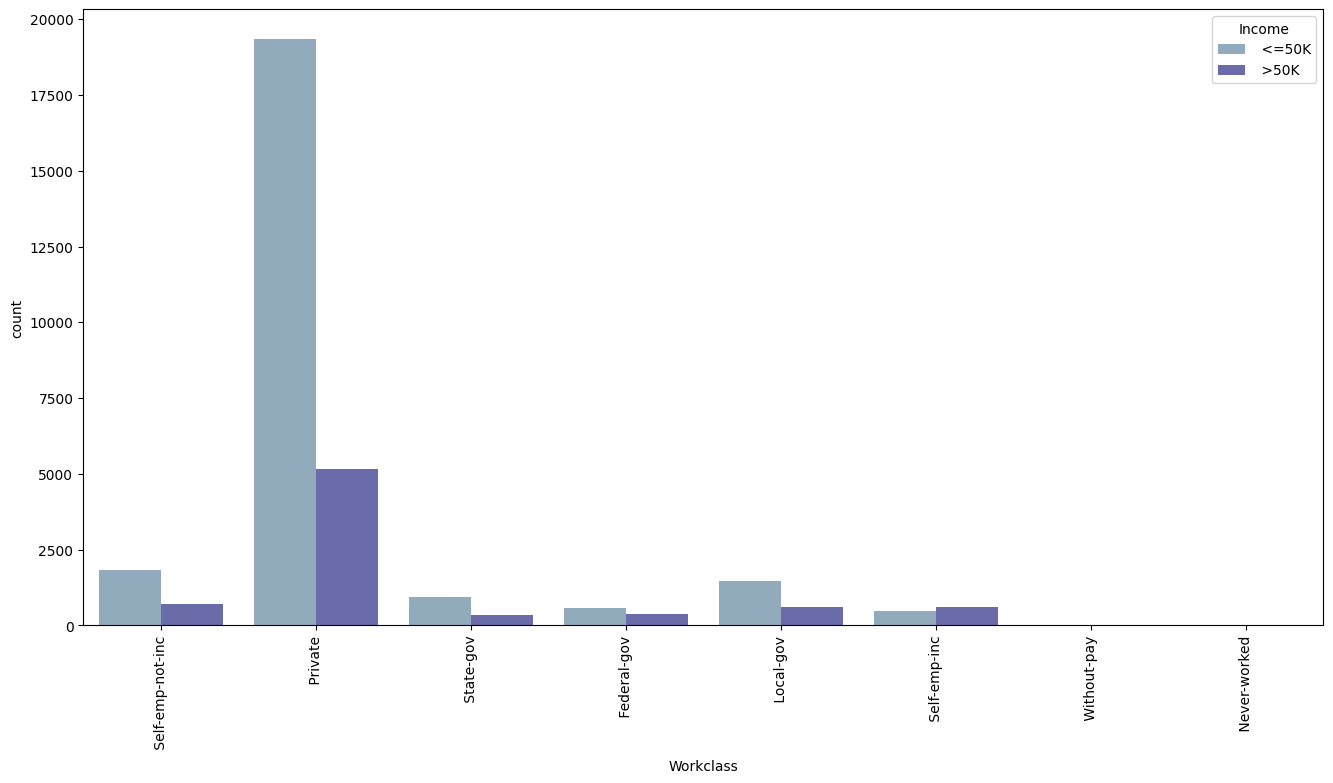

In [40]:
# Workclass vs Income
plt.figure(figsize=(16, 8))
sns.countplot(x='Workclass', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

Apart from Self-emp-inc Workclass, all other Workclasses have more people with Annual income <=50K than with income >50K.

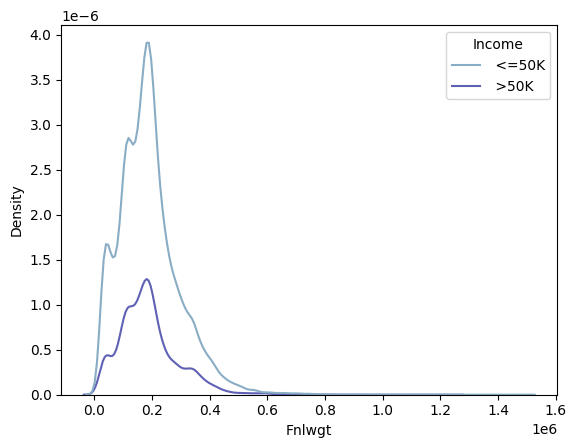

In [41]:
# Fnlwgt vs Income
sns.kdeplot(x="Fnlwgt", data=df, hue="Income")
plt.show()

The Fnlwgt seems to follow a similar distribution for both income ranges, although it is very less for people with income >50K.

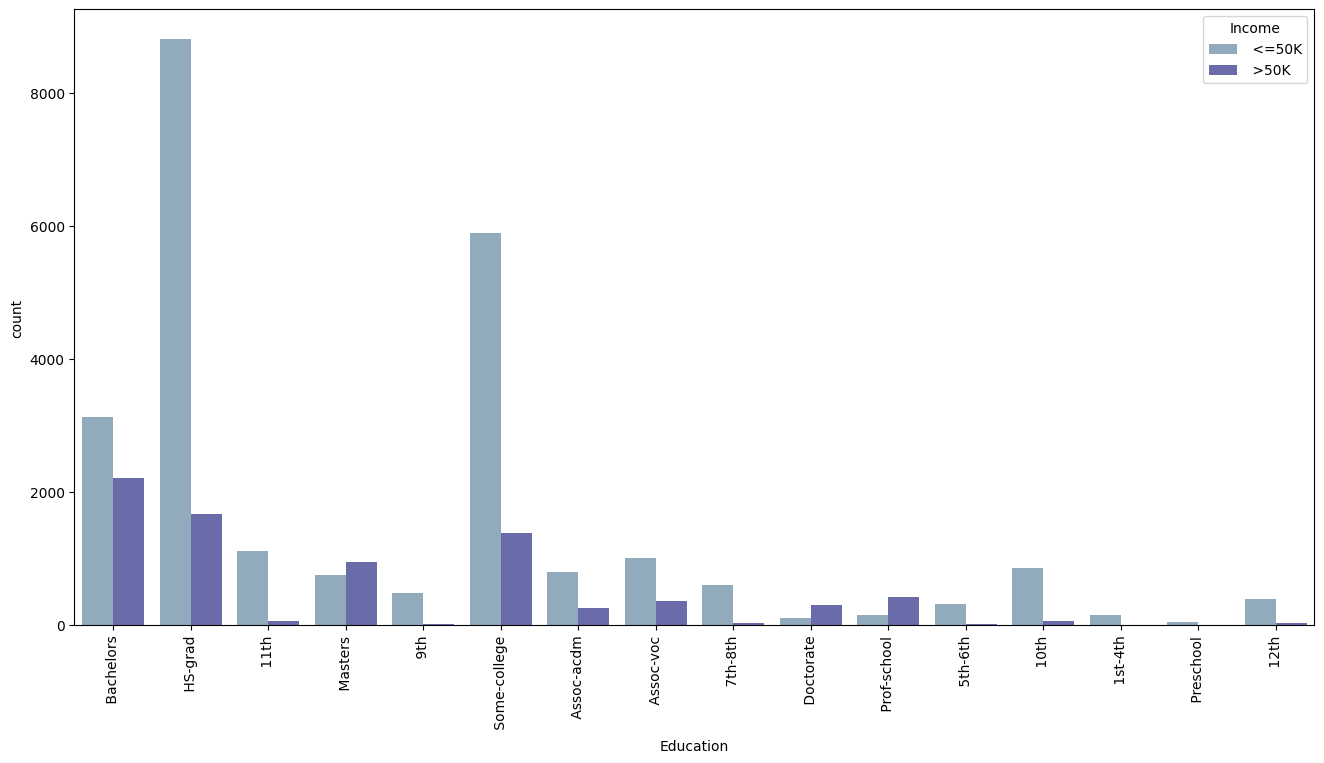

In [42]:
# Education vs Income
plt.figure(figsize=(16, 8))
sns.countplot(x='Education', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

Comparing Education level with the Income, we find that people with Masters, Doctorate, and Prof-school values for Education seem to have more number of people with annual income >50K than with annual income <=50K.<br>
Rest of the people (with any other level of Education) seems to have more number of people earnimg <=50K annually compared to people earning >50K annually.

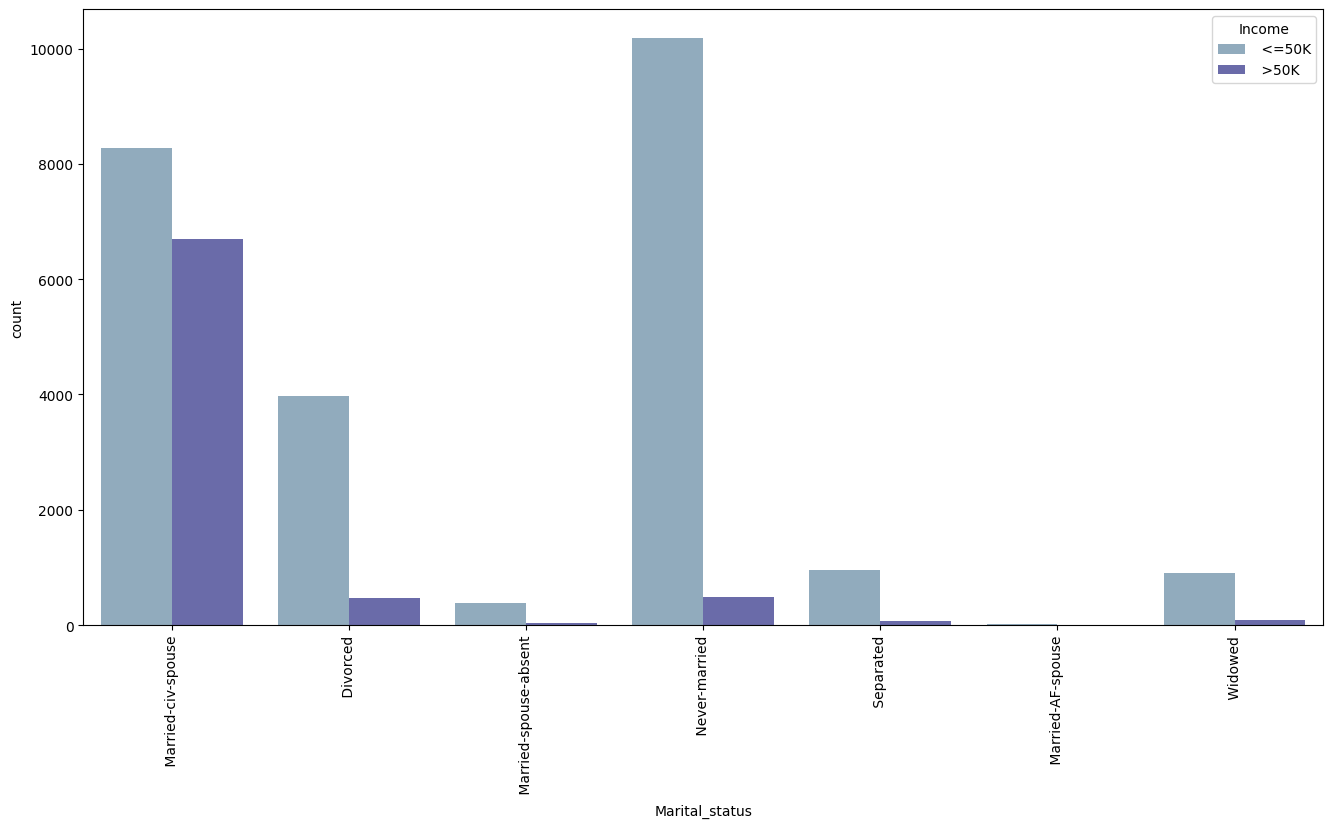

In [43]:
# Marital_status vs Income
plt.figure(figsize=(16, 8))
sns.countplot(x='Marital_status', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

Based on Marital Status, we can observe that more people with status as Married-civ-spouse have annual income of >50K compared to any other marital status.

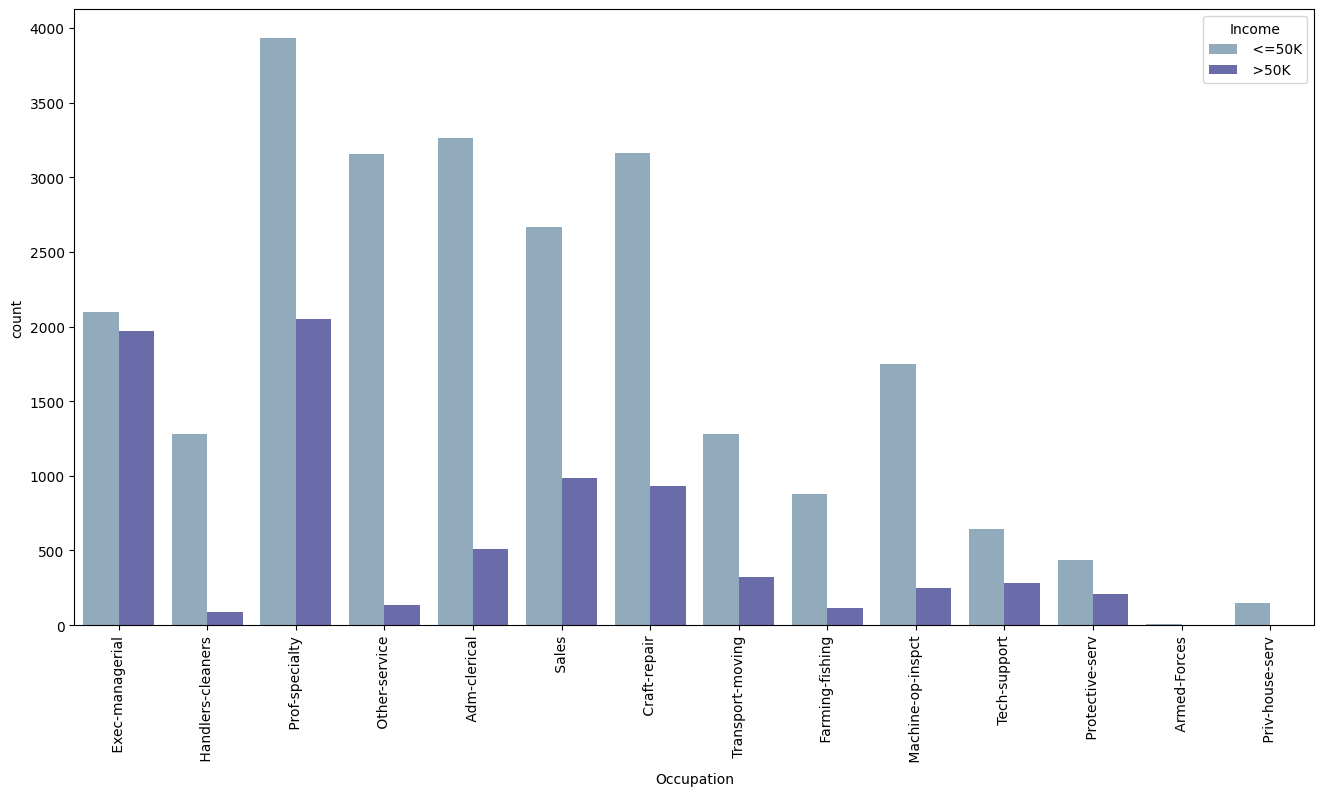

In [44]:
# Occupation vs Income
plt.figure(figsize=(16, 8))
sns.countplot(x='Occupation', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

As we can observe, More people with Exec-managerial and Prof-specialty occupations seem to have >50K annual income.
If we consider the percentage, a higher percentage of Exec-managerial people earn more than 50K annually than Prof-specialty.<br>
Rest of the Occupations have higher number of people with <=50K annual income.

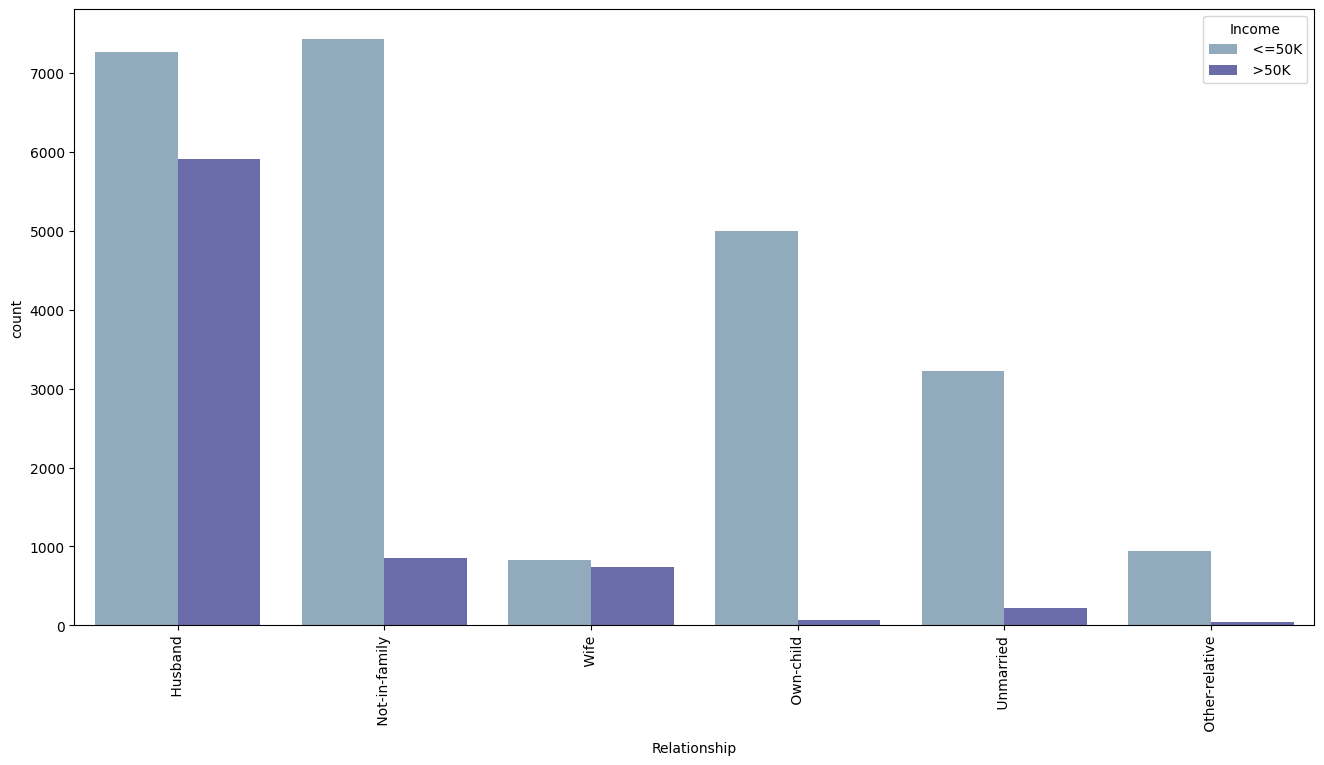

In [45]:
# Relationship vs Income
plt.figure(figsize=(16, 8))
sns.countplot(x='Relationship', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

Comparing the Relationship column with Income shows that the maximum number of people earning >50K annually have the Relationship value as Husband.<br>
If we compare the percentages then both Wife and Husband relatinships have almost similar percentage of people earning greater than 50K. We can compare the percentages for better understanding.

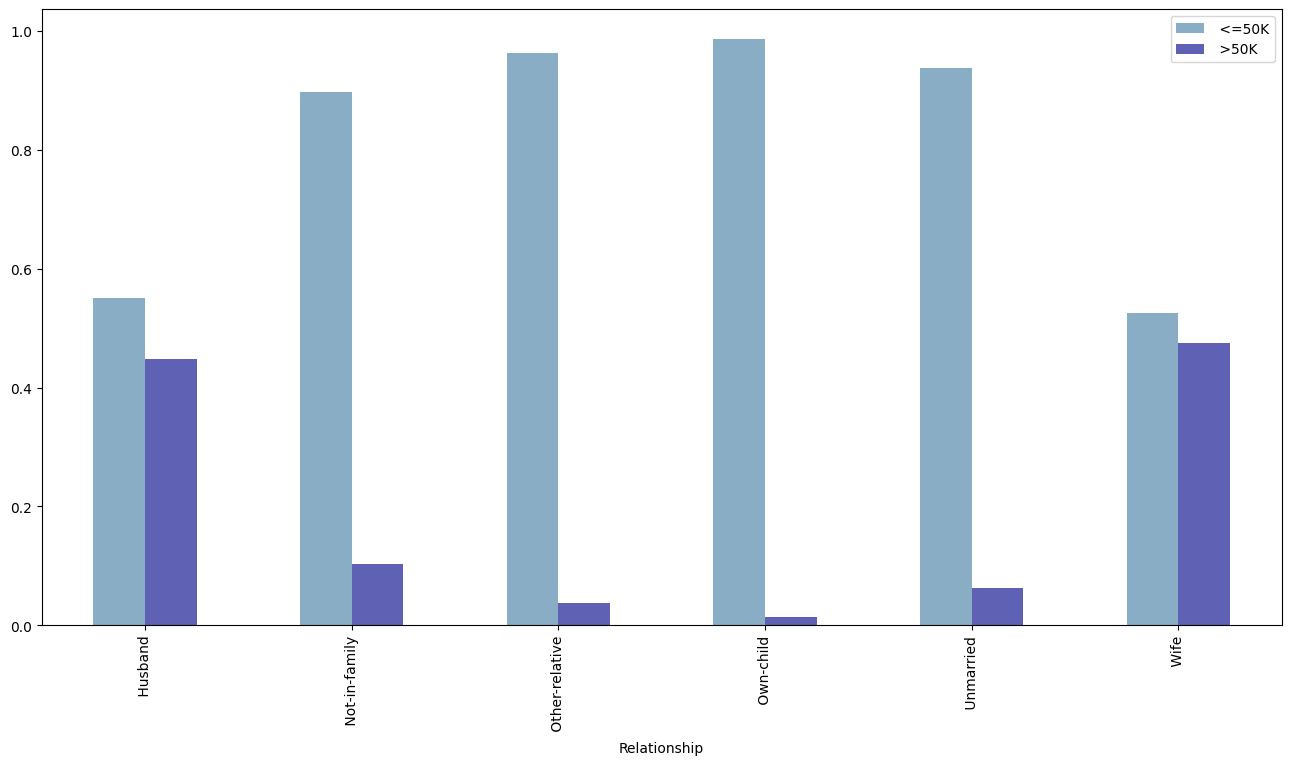

In [46]:
# Relationship vs Income - percentage
percent_data = df.groupby('Relationship')['Income'].value_counts(normalize=True)

percent_data.unstack().plot(kind='bar', figsize=(16, 8))
plt.legend(loc = 'best')
plt.xticks(rotation=90)
plt.show()

As we can see, the percentage of people earning >50K for both Husband and Wife Relationship values is almost similar.

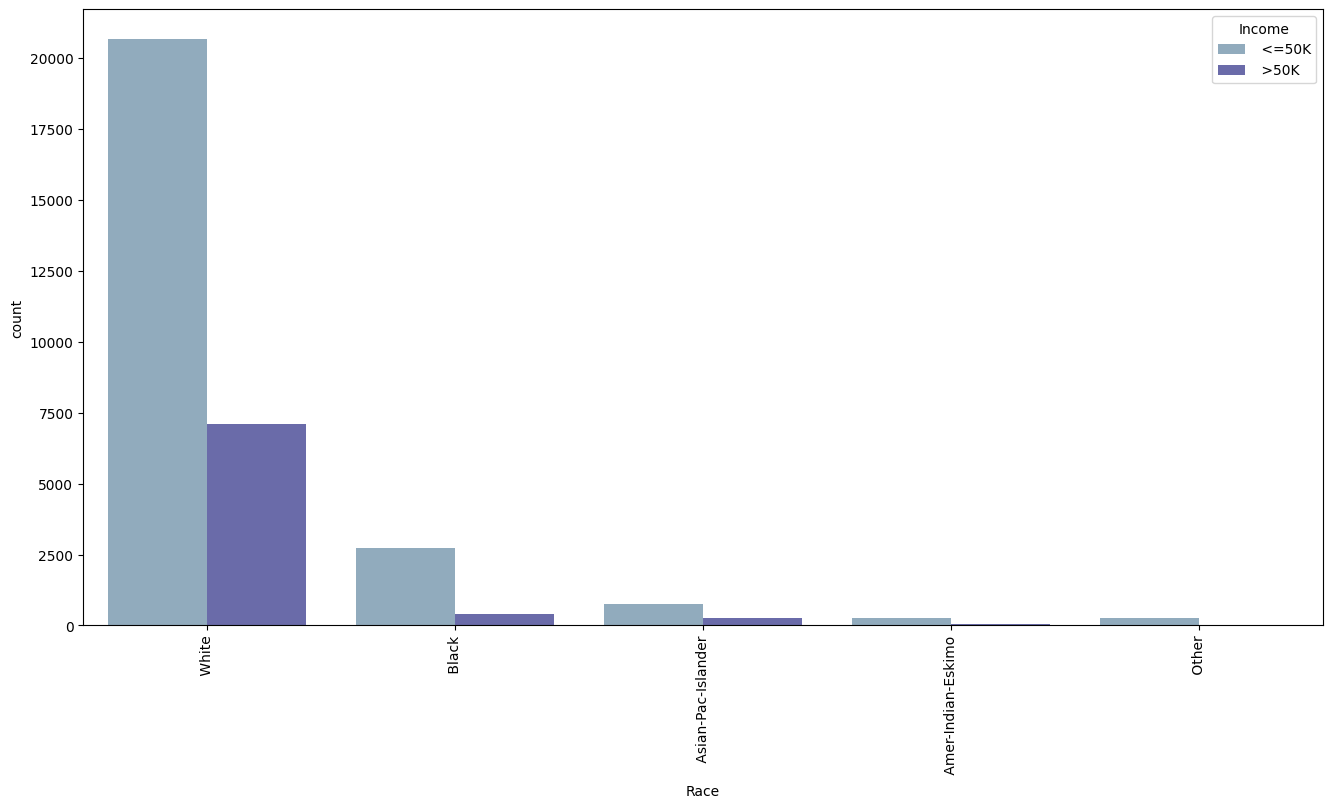

In [47]:
# Race vs Income
plt.figure(figsize=(16, 8))
sns.countplot(x='Race', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

There are moe Whites than any othe race in the dataset, so there is also a higher number of White people with annual income >50K observed.

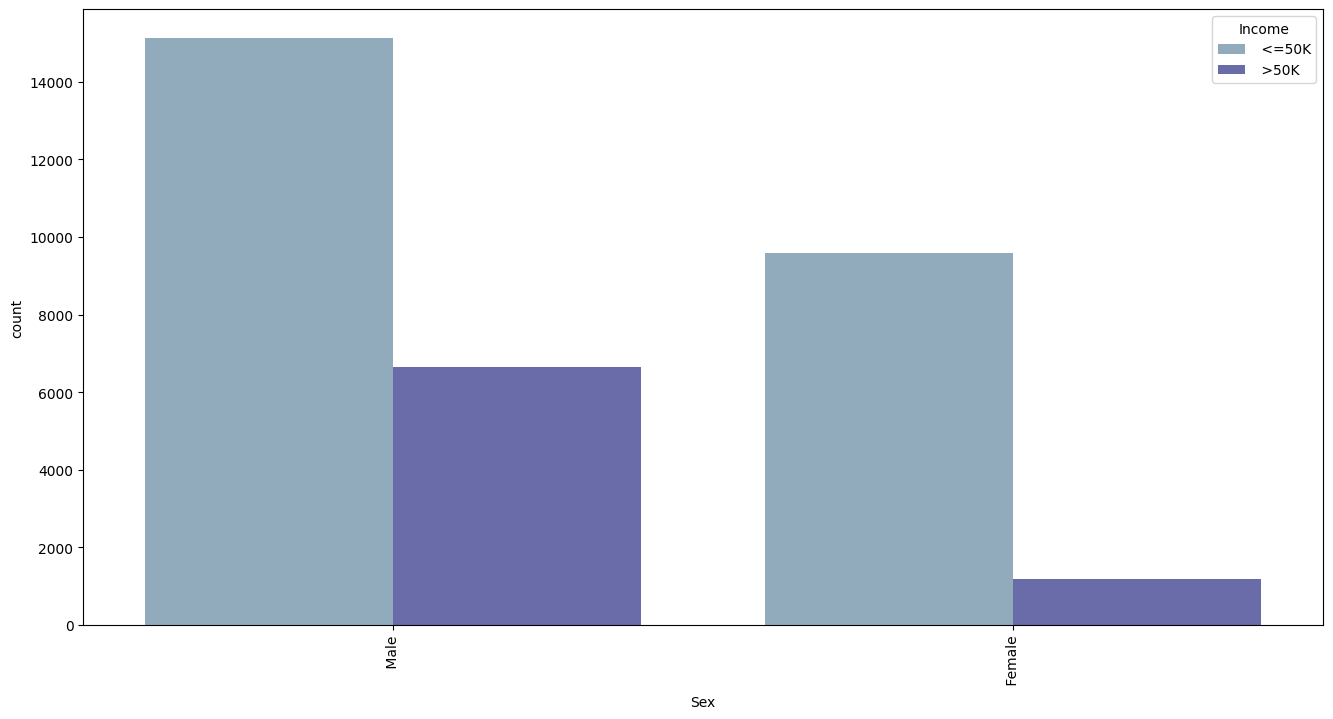

In [48]:
# Sex vs Income
plt.figure(figsize=(16, 8))
sns.countplot(x='Sex', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

Based on the plot above, it is evident that more Males have an annual income >50K than Females.

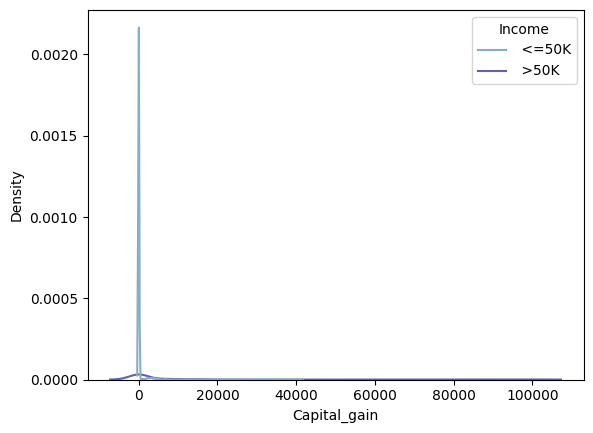

In [49]:
# Capital_gain vs Income
sns.kdeplot(x="Capital_gain", data=df, hue="Income")
plt.show()

The peak value of Capital_gain for both income ranges seems to be 0. 

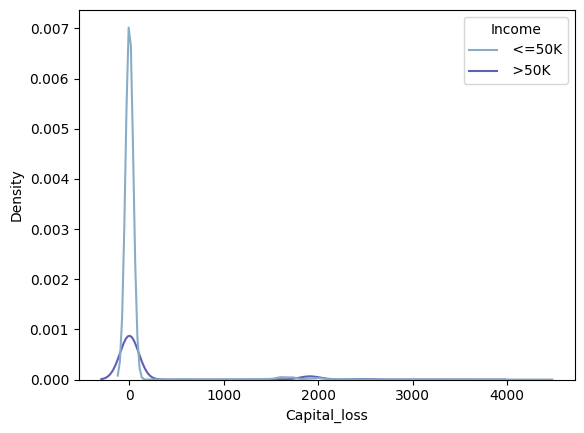

In [50]:
# Capital_loss vs Income
sns.kdeplot(x="Capital_loss", data=df, hue="Income")
plt.show()

The peak value of Capital_loss for both income ranges seems to be 0. There seems to be a second small peak around 2000 for annual income of >50K and a little less than 2000 for annual income of <=50K.

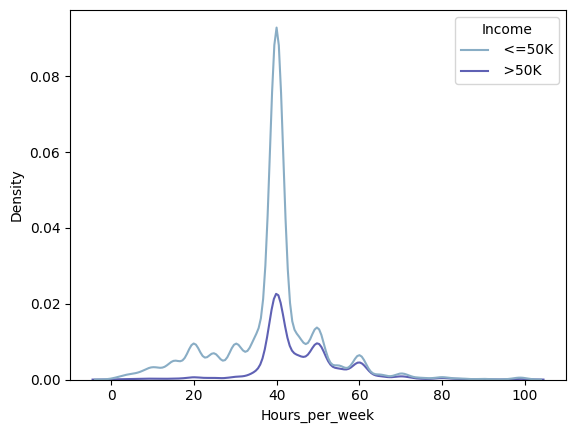

In [51]:
# Hours_per_week vs Income
sns.kdeplot(x="Hours_per_week", data=df, hue="Income")
plt.show()

Hours_per_week seems to have a similar distribution for both income ranges. For annual income >50K, the distribution density increases with increase in the hours per week compared to annual income <=50K.

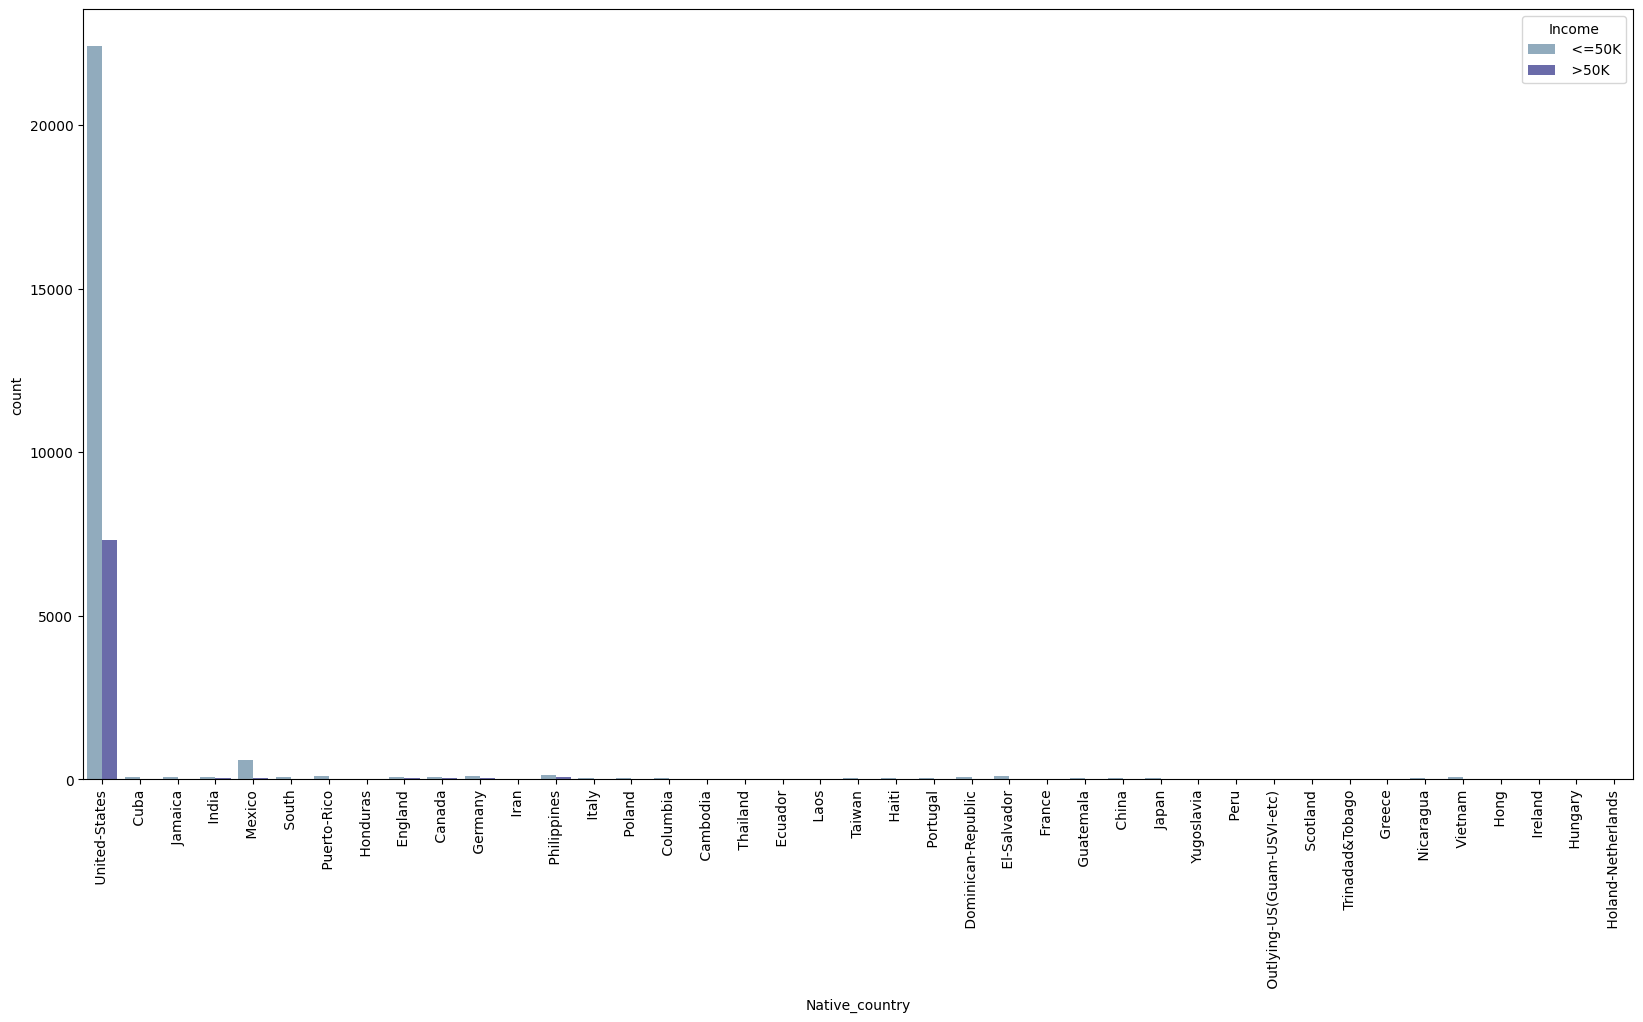

In [52]:
# Native_country vs Income
plt.figure(figsize=(20, 10))
sns.countplot(x='Native_country', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

It is evident from the plot that the highest number of people earning >50K annually are native to the United States. Next, we need to check what percentage of people native to each country earn anually.

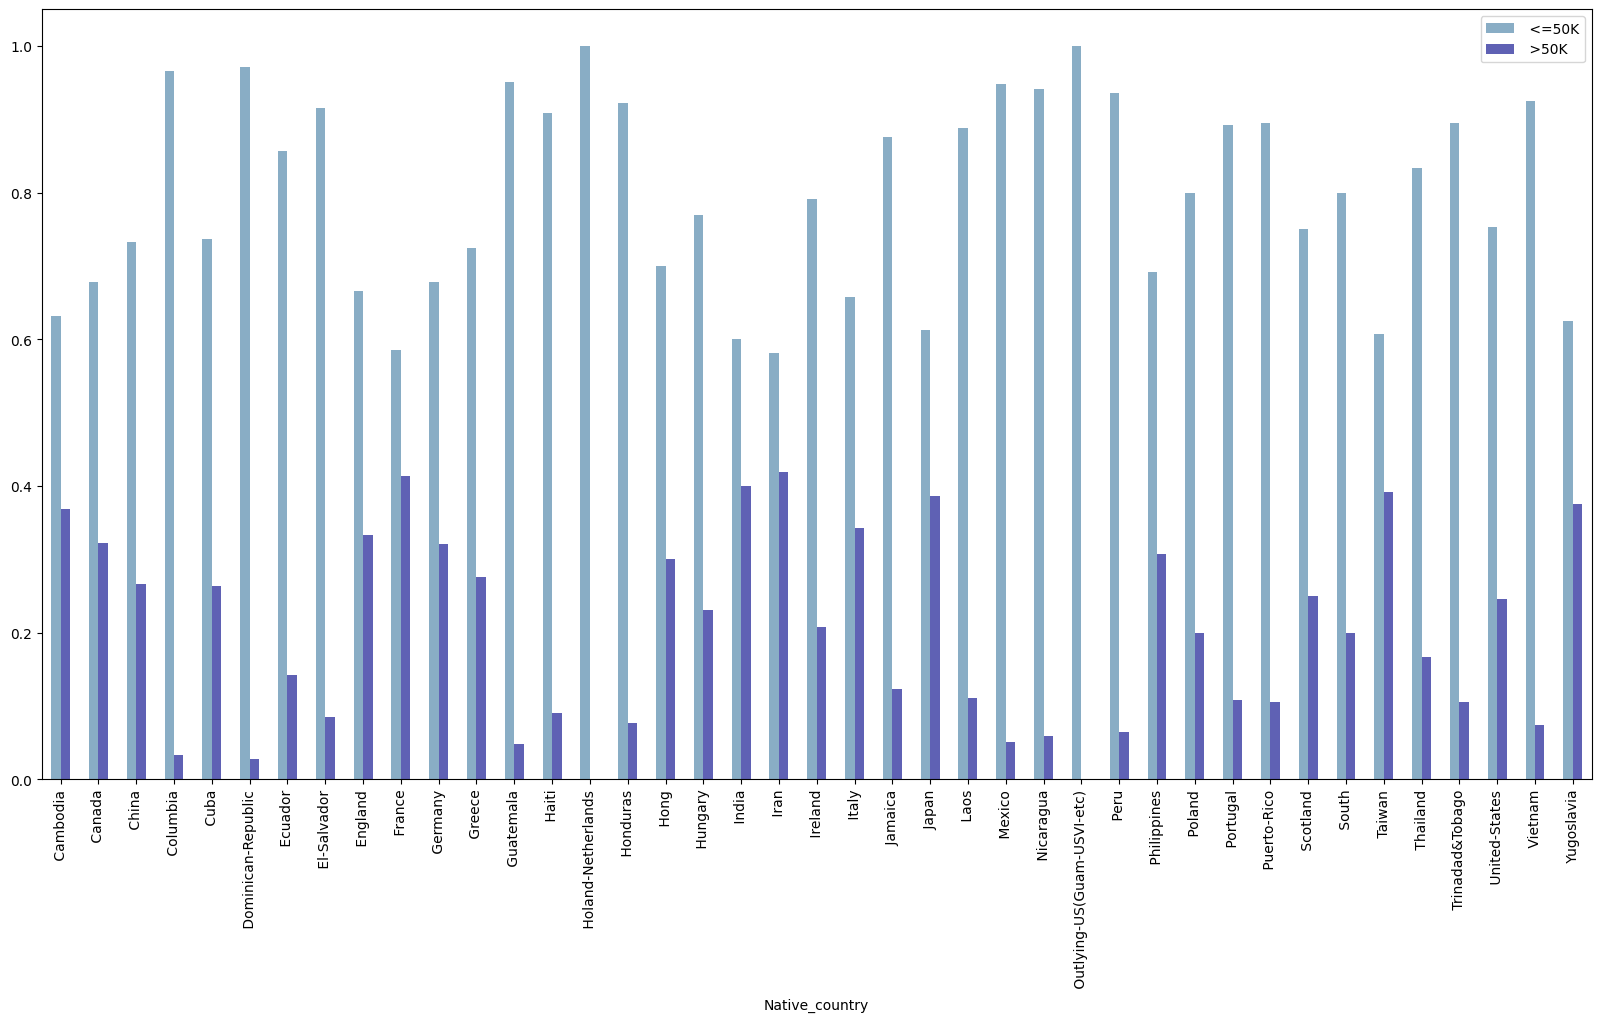

In [53]:
# Native_country vs Income - percentage
percent_data = df.groupby('Native_country')['Income'].value_counts(normalize=True)

percent_data.unstack().plot(kind='bar', figsize=(20, 10))
plt.legend(loc = 'best')
plt.xticks(rotation=90)
plt.show()

Based on the percentages, we can observe that people native to Iran, France, India, Taiwan and Japan seem to have higher percentage of people with income >50K compared to other countres.

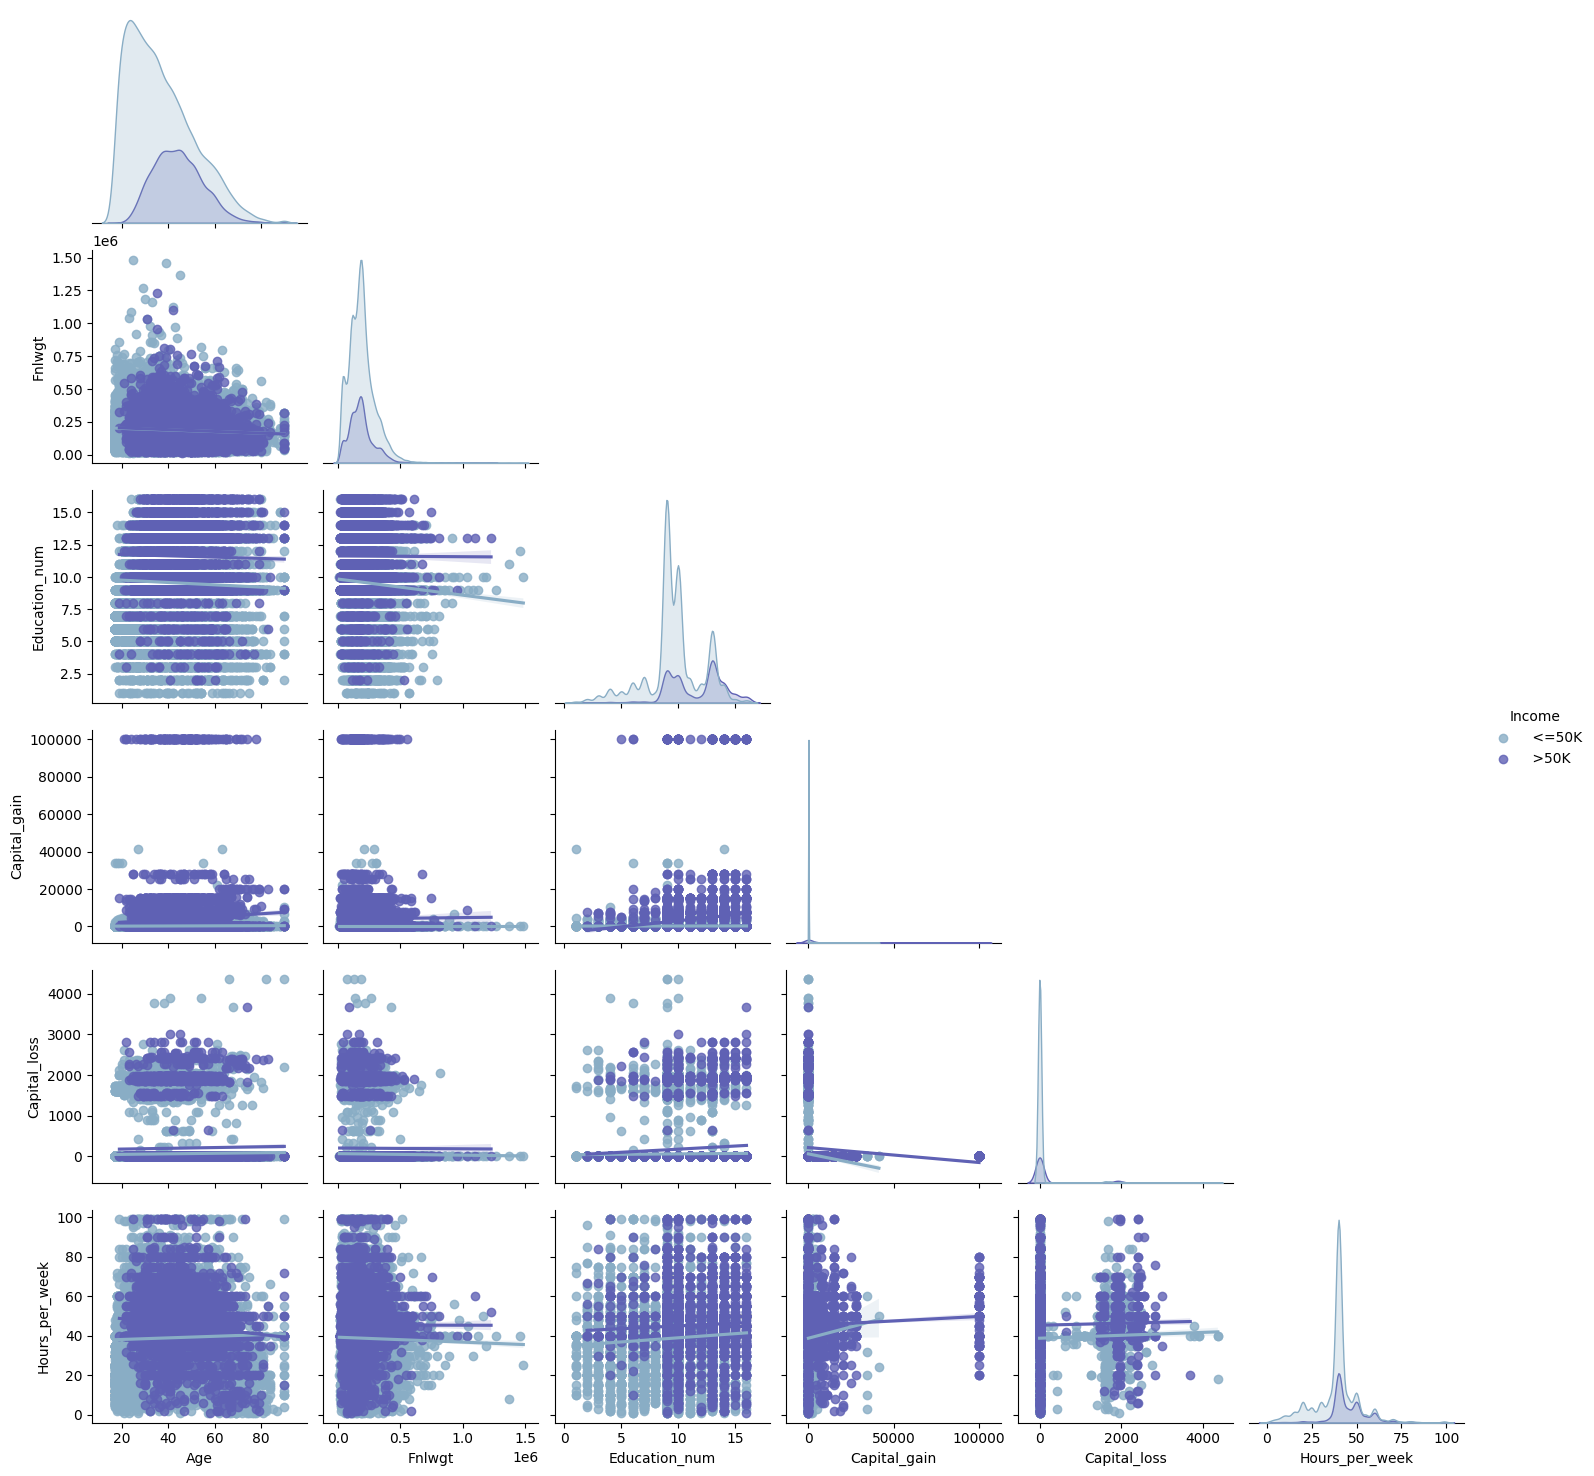

In [54]:
# Pairwise relation between variables with respect to the Survived
sns.pairplot(df, hue='Income', corner=True, kind='reg')
plt.show()

The observations from the pairplot are:
- All linear relationships observed from the pairplot seem to be quite weak weak.
- Both positive and negative relationships are observed, which need to be further explored through Correlation analysis.

### Checking for outliers

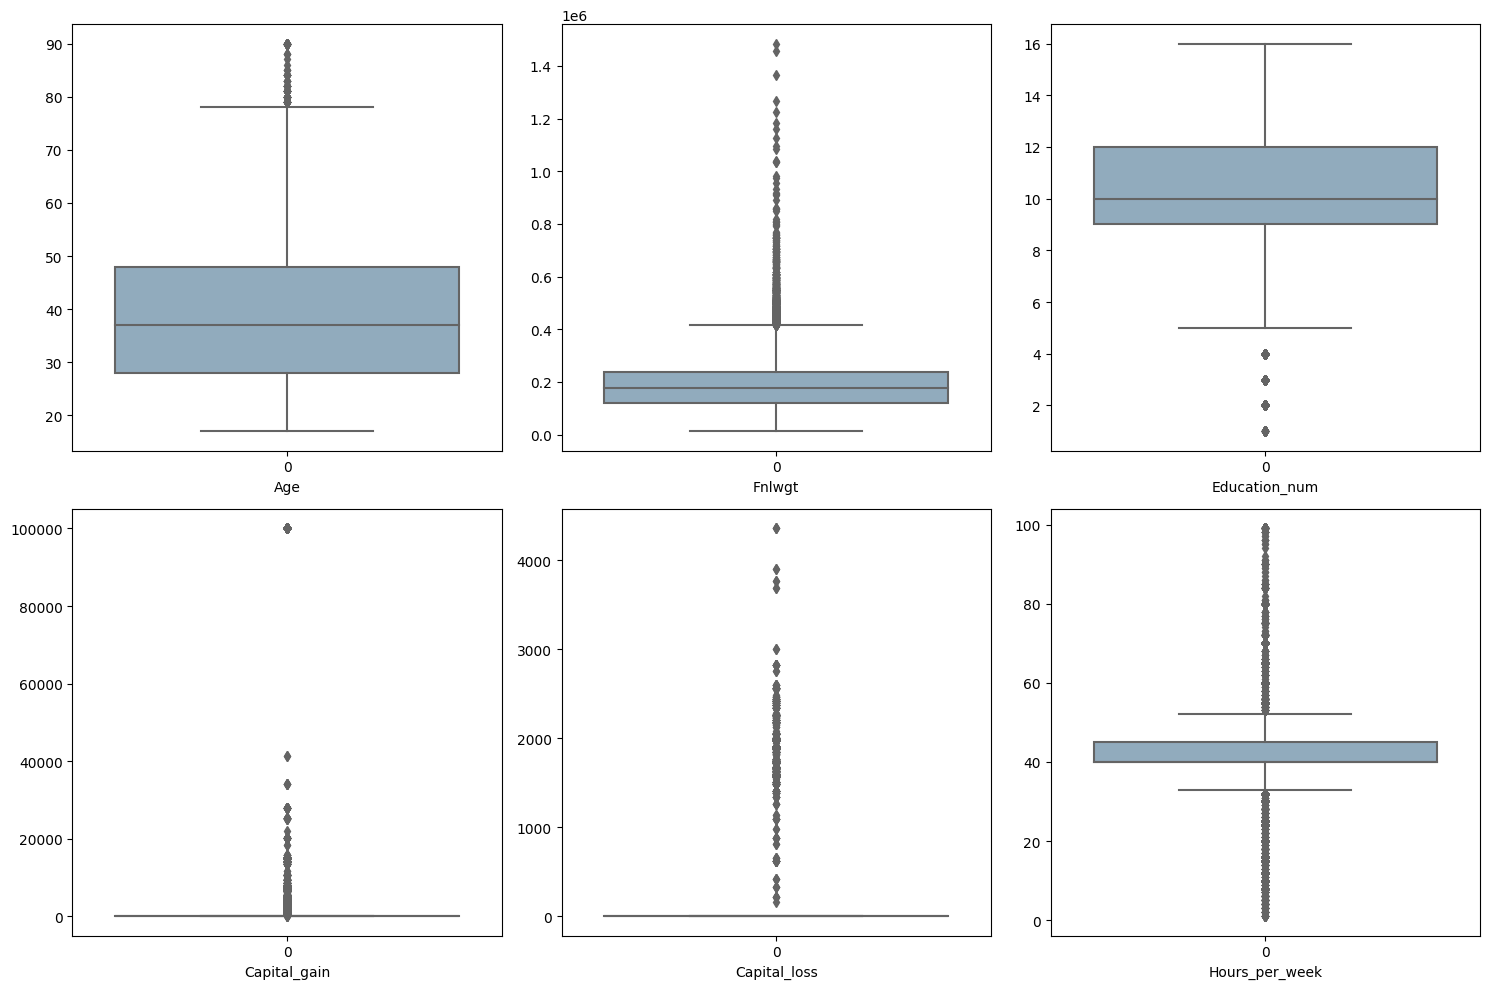

In [55]:
# Checking for outliers using boxplot
plt.figure(figsize=(15, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 6:
        ax = plt.subplot(2, 3, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

All the columns above have outliers present which need to be removed using a suitable method.

#### Z-score method

In [56]:
from scipy.stats import zscore

In [57]:
out_features = df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]
z = np.abs(zscore(out_features))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,1.134817,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.420646,0.145969,0.216747,0.035664
2,1.056935,0.425720,1.198377,0.145969,0.216747,0.035664
3,0.776180,1.408036,1.134817,0.145969,0.216747,0.035664
4,0.116259,0.898091,1.523683,0.145969,0.216747,0.035664
...,...,...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.420646,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.420646,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.420646,0.145969,0.216747,1.655506


In [58]:
# Removing data where z-score is above 3 (threshold value) for normal distribution
df_z = df[(z<3).all(axis=1)]
df_z.shape

(29808, 15)

In [59]:
# Data loss percentage
old = df.shape[0]
new_z = df_z.shape[0]

(old - new_z)/old * 100

8.384558642734202

Data loss percentage is around 7.78% for Z-score method.

#### IQR method

In [60]:
q1 = out_features.quantile(0.25)
q3 = out_features.quantile(0.75)

iqr = q3 - q1

df_q = df[~((df < (q1 - 1.5*iqr))| (df > (q3 + 1.5*iqr))).any(axis=1)]

df_q.shape

(18983, 15)

In [61]:
# Data loss percentage
old = df.shape[0]
new_q = df_q.shape[0]

(old - new_q)/old * 100

41.65539709859847

Data loss percentage is around 39.43%, which is higher than the acceptable value. Normally, we consider data loss of less than 10% only.<br>

So, we will use the z-score method to remove outliers.

In [62]:
df = df_z

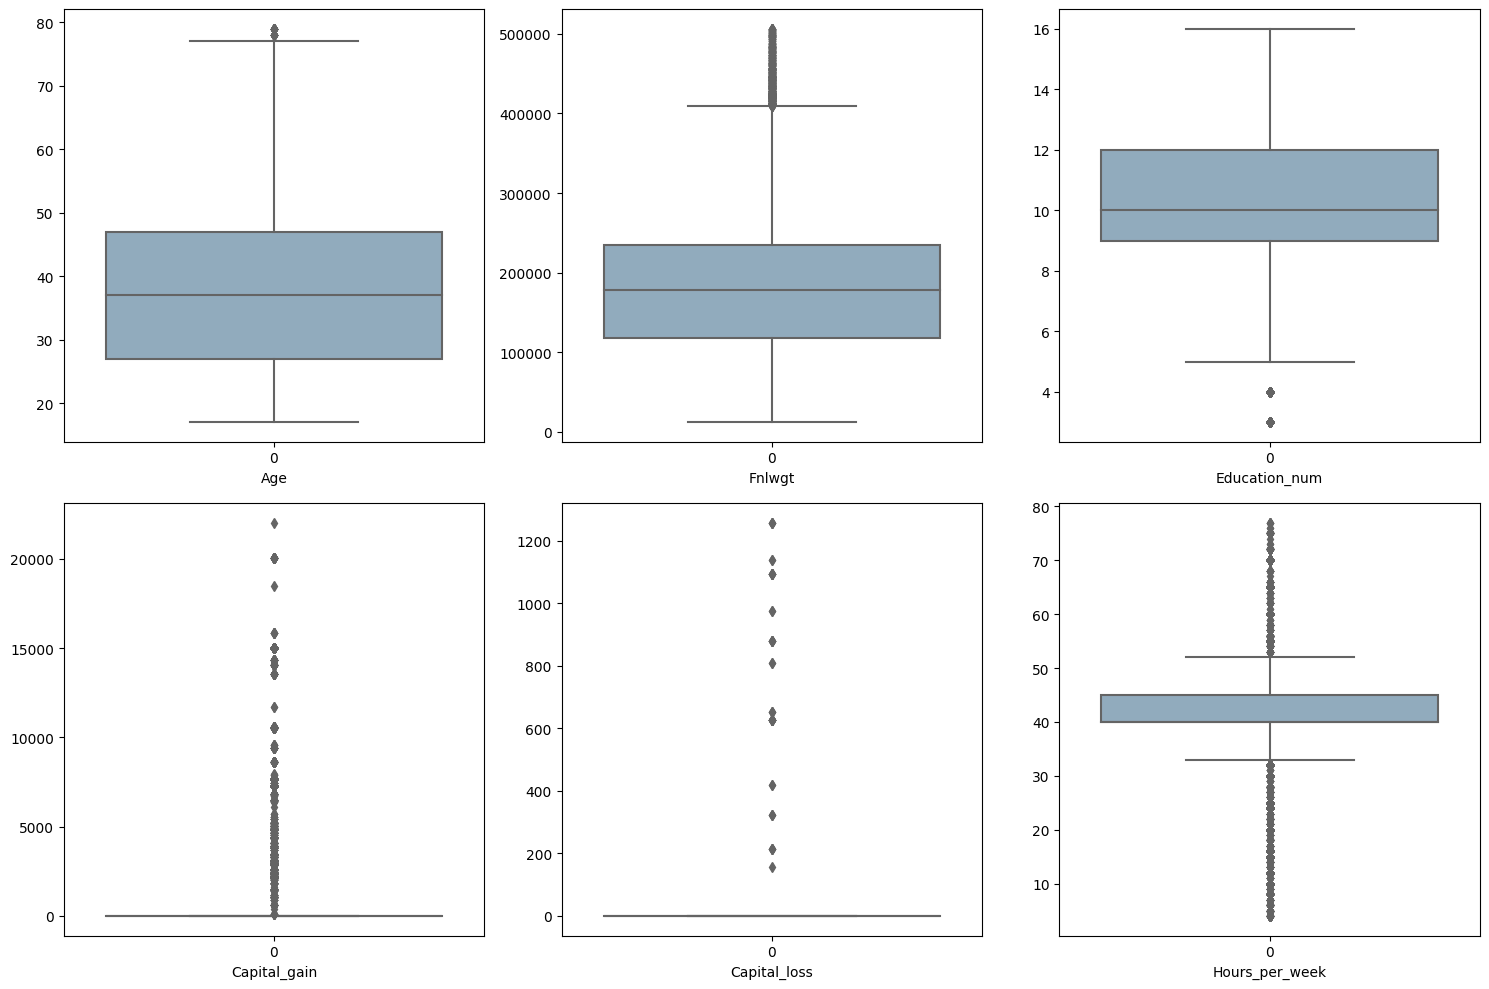

In [63]:
# Checking for outliers again using boxplot
plt.figure(figsize=(15, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 6:
        ax = plt.subplot(2, 3, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

There are fewer outliers in the dataset now.

### Checking for skewness

In [64]:
df.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

The acceptable skewness range is between -0.5 to 0.5 (for extremely normal distributions) and between -1 to 1 for moderately normal distribution<br>
This means that Capital_gain and capital_loss have very high skewness that needs to be removed.

In [65]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

Since the skewness is very high , but most of the values for Capital_gain and Capital_loss are zero, we can add an offset.

In [66]:
offset = 1

In [67]:
# Removing skewness
columns = ['Capital_gain', 'Capital_loss']

skew_transform = {}

for col in columns:
    transformed_log = np.log(df[col] + offset)                    # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col], 0.15)          # Box-Cox Transformation
    transformed_inverse = 1 / (df[col] + offset)                  # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])         # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df[col])                           # Cube Root Transformation
    transformed_sqrt = np.sqrt(df[col])                           # Square Root Transformation
    

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt),
        "Square Root Transformation": stats.skew(transformed_sqrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [68]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

,Capital_gain,Capital_loss
Log Transformation,3.115768,25.101192
Box-Cox Transformation,3.197581,25.385110
Inverse Transformation,-3.072650,-24.859698
Yeo Johnson Transformation,3.072649,24.859638
Cube Root Transformation,3.373603,25.756251
Square Root Transformation,3.691353,26.601878


The Yeo Johnson transformation is the most suitable transformation for this data, as it reduces the skewness as much as possible. None of the transformations can reduce skewness to the acceptable range.

In [69]:
# Transforming using YeoJohnson
for col in columns:
    transformed_col, _ = stats.yeojohnson(df[col])
    df[col] = transformed_col

In [70]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.0,-0.0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.0,-0.0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.0,-0.0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.0,-0.0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.0,-0.0,40,United-States,<=50K


These are the transformed values. We can check the skewness again now.

In [71]:
df.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       3.072803
Capital_loss      24.860889
Hours_per_week    -0.353124
dtype: float64

The skewness values are slightly reduced now.

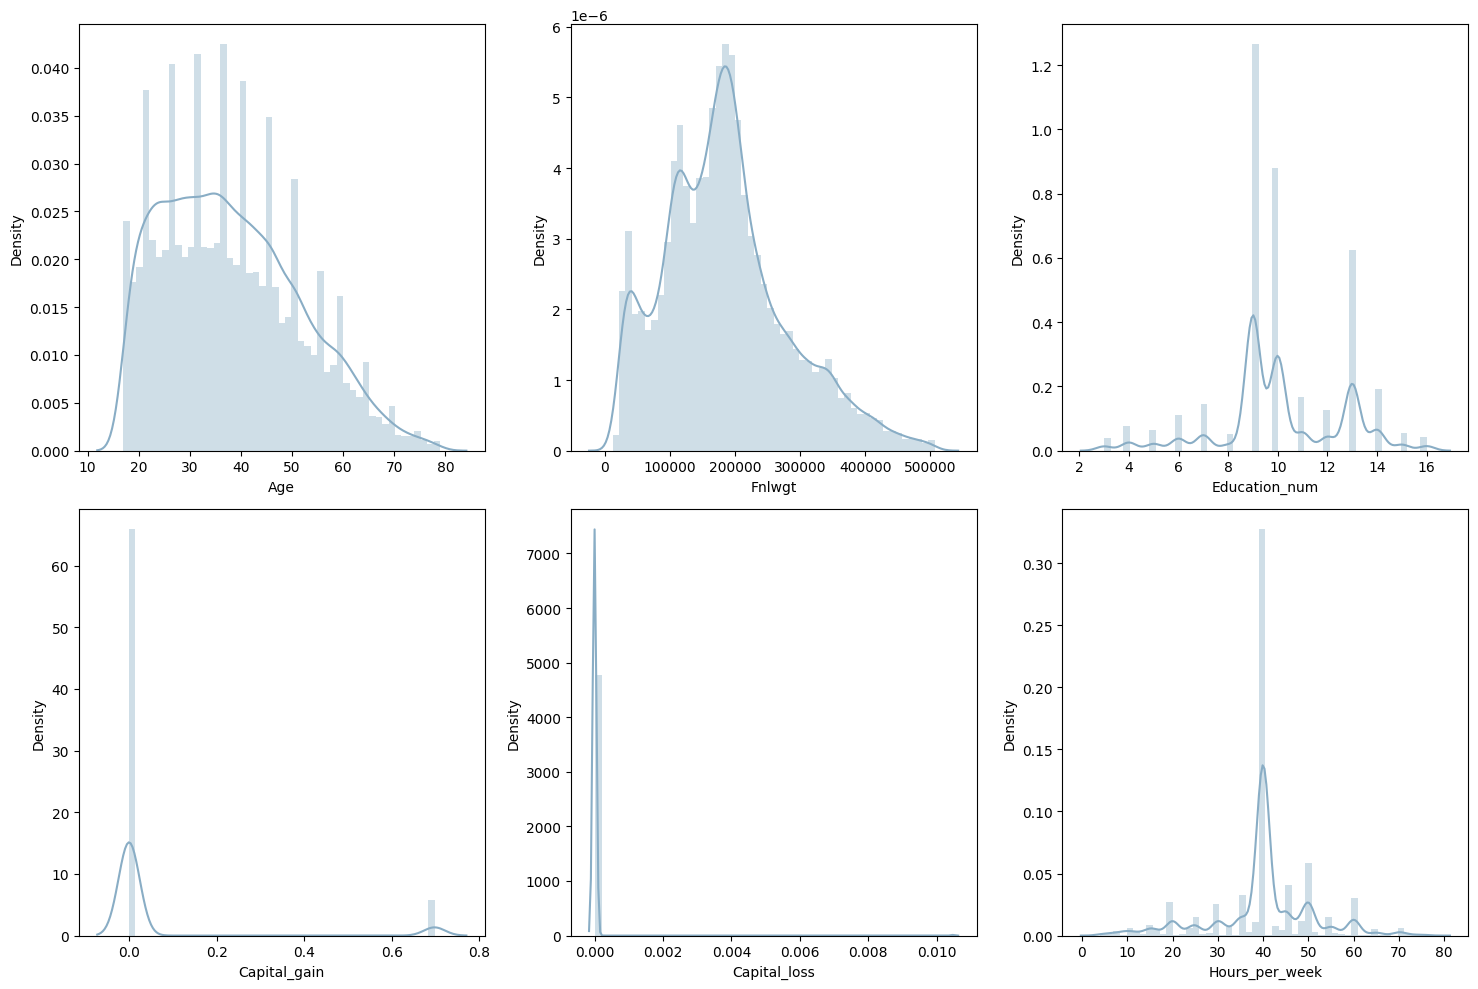

In [72]:
# Data distribution
plt.figure(figsize=(15, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 6:
        ax = plt.subplot(2, 3, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The distribution for all variables look more normalised now.

### Encoding categorical variables

In [73]:
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [74]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i].values.reshape(-1, 1))

In [75]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,8,13,2,3,0,4,1,-0.0,-0.0,13,37,0
1,38,3,215646,10,9,0,5,1,4,1,-0.0,-0.0,40,37,0
2,53,3,234721,1,7,2,5,0,2,1,-0.0,-0.0,40,37,0
3,28,3,338409,8,13,2,9,5,2,0,-0.0,-0.0,40,4,0
4,37,3,284582,11,14,2,3,5,4,0,-0.0,-0.0,40,37,0


The categorical variables have been encoded now. Income <=50K is 0 and >50K is 1.

Both Education and Education_num represent the same thing, with education_num having a more quantifable value. The Education_num increases with the level of higher education. The categorical column Education does not have labels in that order. So we should drop the Education column.

In [76]:
df.drop(columns='Education', inplace=True)

### Correlation analysis

In [77]:
df.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.032951,-0.074430,0.041431,-0.285335,-0.002594,-0.266802,0.027937,0.086589,0.121386,0.019600,0.091817,-0.001640,0.239314
Workclass,0.032951,1.000000,-0.022991,-0.000674,-0.016093,0.008216,-0.057609,0.045442,0.068831,0.003634,-0.009958,0.027270,-0.001685,-0.007180
Fnlwgt,-0.074430,-0.022991,1.000000,-0.037725,0.029000,-0.002200,0.008349,-0.010514,0.028520,-0.005712,0.000633,-0.015489,-0.060659,-0.009160
Education_num,0.041431,-0.000674,-0.037725,1.000000,-0.059092,0.069639,-0.096694,0.028587,0.009276,0.105267,0.008952,0.150713,0.058248,0.318731
Marital_status,-0.285335,-0.016093,0.029000,-0.059092,1.000000,0.035351,0.184713,-0.066169,-0.123350,-0.063945,-0.017029,-0.195162,-0.016736,-0.194355
Occupation,-0.002594,0.008216,-0.002200,0.069639,0.035351,1.000000,-0.036558,-0.003263,0.049930,0.006338,-0.000286,-0.022743,-0.001708,0.030533
Relationship,-0.266802,-0.057609,0.008349,-0.096694,0.184713,-0.036558,1.000000,-0.116226,-0.577197,-0.081246,0.036363,-0.257798,-0.011165,-0.245913
Race,0.027937,0.045442,-0.010514,0.028587,-0.066169,-0.003263,-0.116226,1.000000,0.089914,0.024404,-0.000896,0.045400,0.117269,0.071755
Sex,0.086589,0.068831,0.028520,0.009276,-0.123350,0.049930,-0.577197,0.089914,1.000000,0.064221,-0.033094,0.233755,0.002282,0.209946
Capital_gain,0.121386,0.003634,-0.005712,0.105267,-0.063945,0.006338,-0.081246,0.024404,0.064221,1.000000,-0.011919,0.073096,0.010317,0.261879


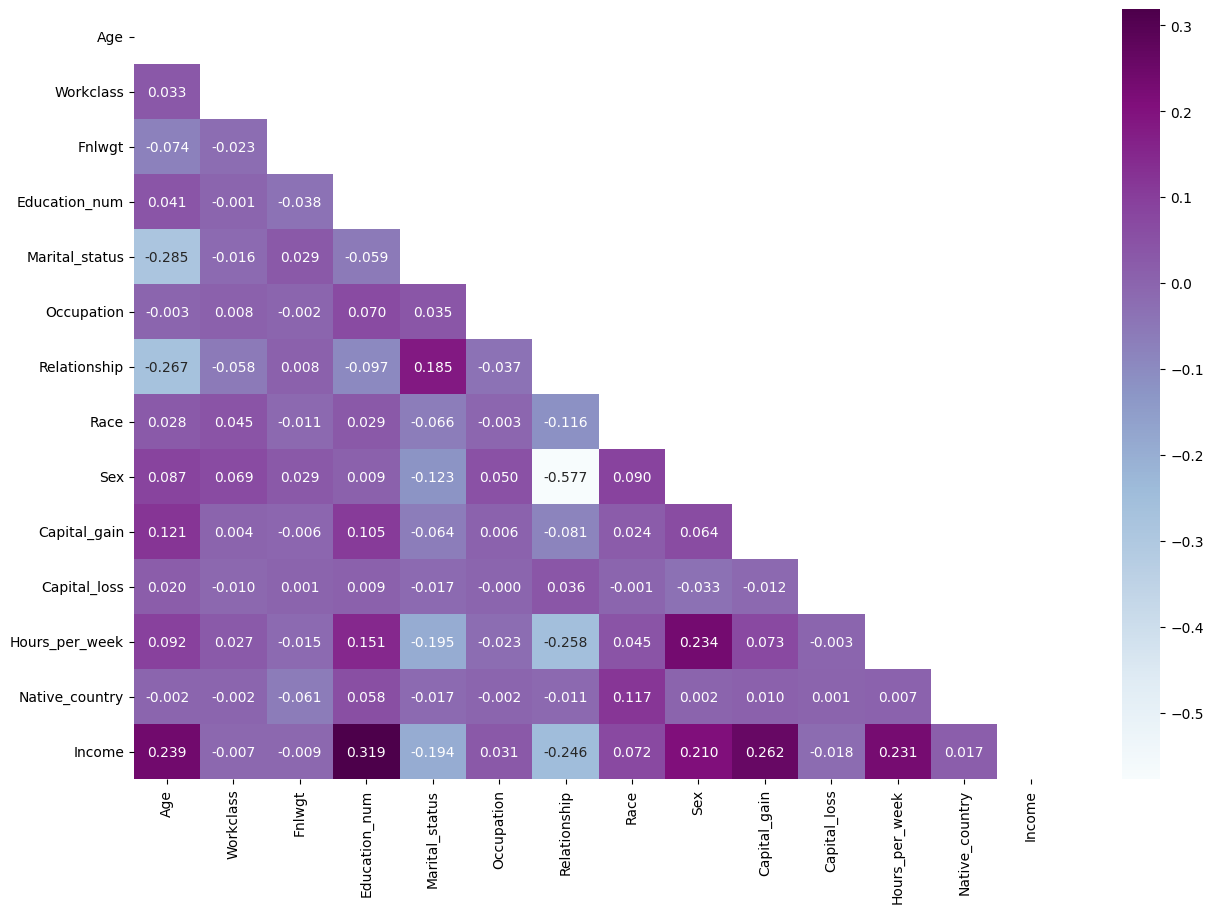

In [78]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
palette = sns.color_palette("BuPu", as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap=palette, mask=mask)
plt.show()

All the relationships are very weak.<br>
The strongest relationship is between Relationship and Sex, with a correlation coefficient of -0.577<br>
The target variable Income has the strongest relationship with Education_num with correlation of 0.319.

In [79]:
df.corr()['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.318731
Capital_gain      0.261879
Age               0.239314
Hours_per_week    0.230589
Sex               0.209946
Race              0.071755
Occupation        0.030533
Native_country    0.016792
Workclass        -0.007180
Fnlwgt           -0.009160
Capital_loss     -0.017506
Marital_status   -0.194355
Relationship     -0.245913
Name: Income, dtype: float64

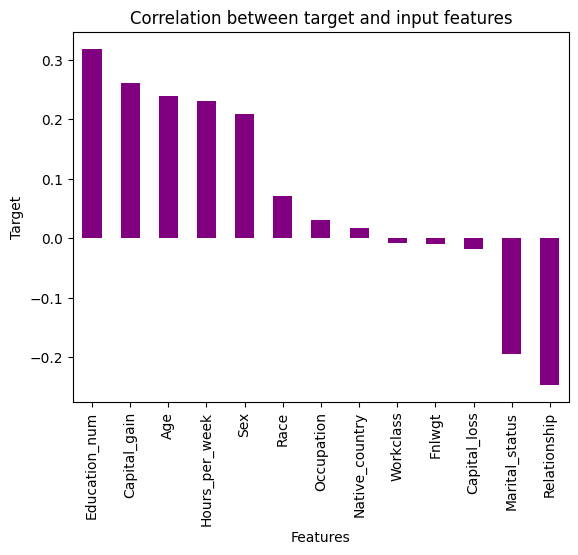

In [80]:
# Visualising the correlation between target and input features
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar', color='purple')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

The target variable Income has the strongest relationship with Education_num, followed bt Capital gain, Relationship and Age.

### Separating features and target

In [81]:
x = df.drop('Income', axis=1)
y = df['Income']

#### Feature scaling

In [82]:
# Importing MinMaxScaler (since data is not normally distributed)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.532258,0.714286,0.143733,0.769231,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.123288,0.948718
1,0.338710,0.428571,0.411536,0.461538,0.000000,0.384615,0.2,1.0,1.0,0.0,0.0,0.493151,0.948718
2,0.580645,0.428571,0.450138,0.307692,0.333333,0.384615,0.0,0.5,1.0,0.0,0.0,0.493151,0.948718
3,0.177419,0.428571,0.659968,0.769231,0.333333,0.692308,1.0,0.5,0.0,0.0,0.0,0.493151,0.102564
4,0.322581,0.428571,0.551040,0.846154,0.333333,0.230769,1.0,1.0,0.0,0.0,0.0,0.493151,0.948718


### Checking Variance Inflation Factor

In [83]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,Age,3.800662
1,Workclass,8.291859
2,Fnlwgt,4.143785
3,Education_num,9.288596
4,Marital_status,4.146627
5,Occupation,3.325332
6,Relationship,2.730372
7,Race,17.539556
8,Sex,4.375408
9,Capital_gain,1.120063


There is multicollinearity in the dataset as VIF values are greater than 10 (indicates moderate collinearity). We should remove Native_country from the dataset.

In [84]:
x.drop(columns=['Native_country'], inplace=True)

In [85]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,Age,3.672480
1,Workclass,8.046802
2,Fnlwgt,4.105692
3,Education_num,8.803276
4,Marital_status,3.983014
5,Occupation,3.299843
6,Relationship,2.562265
7,Race,14.521080
8,Sex,4.290365
9,Capital_gain,1.119663


Now we need to remove Race column from the data.

In [86]:
x.drop(columns=['Race'], inplace=True)

In [87]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,Age,3.532818
1,Workclass,7.572390
2,Fnlwgt,4.016069
3,Education_num,8.362572
4,Marital_status,3.864180
5,Occupation,3.273007
6,Relationship,2.473046
7,Sex,4.142926
8,Capital_gain,1.119565
9,Capital_loss,1.004716


In [88]:
x.drop(columns=['Hours_per_week'], inplace=True)

In [89]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,Age,3.387101
1,Workclass,7.183103
2,Fnlwgt,3.930081
3,Education_num,7.176088
4,Marital_status,3.857249
5,Occupation,3.264504
6,Relationship,2.443748
7,Sex,3.765588
8,Capital_gain,1.119209
9,Capital_loss,1.004706


Now the multicollinearity issue is resolved.

### Model Building

In [90]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Splitting data into train and test

In [91]:
# Finding the best random state for splitting the data into training and validation sets.
max_accu = 0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.3,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.8276864586827687
Random state for best accuracy: 174


In [92]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

#### Checking for class imbalance

In [93]:
y_train.value_counts()

0    16209
1     4656
Name: Income, dtype: int64

There seems to be a huge class imbalance which needs to be handled.

#### Oversampling using SMOTE

In [94]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # choosing random state for reproducible results
x1, y1 = sm.fit_resample(x_train, y_train)

In [95]:
y1.value_counts()

1    16209
0    16209
Name: Income, dtype: int64

The imbalance has now been resolved by oversampling.

#### Classification Models

In [96]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [97]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

,Model,Accuracy
9,CatBoost,0.866711
8,XGBoost,0.861568
4,Random Forest,0.840210
5,Extra Trees,0.832830
7,Gradient Boosting,0.824332
6,AdaBoost,0.813038
3,Decision Tree,0.800626
2,KNN,0.770435
1,Support Vector Classifier,0.765739
0,Logistic Regression,0.746394


We can observe that CatBoost model performs the best with 86.67% accuracy.

#### Confusion matrices

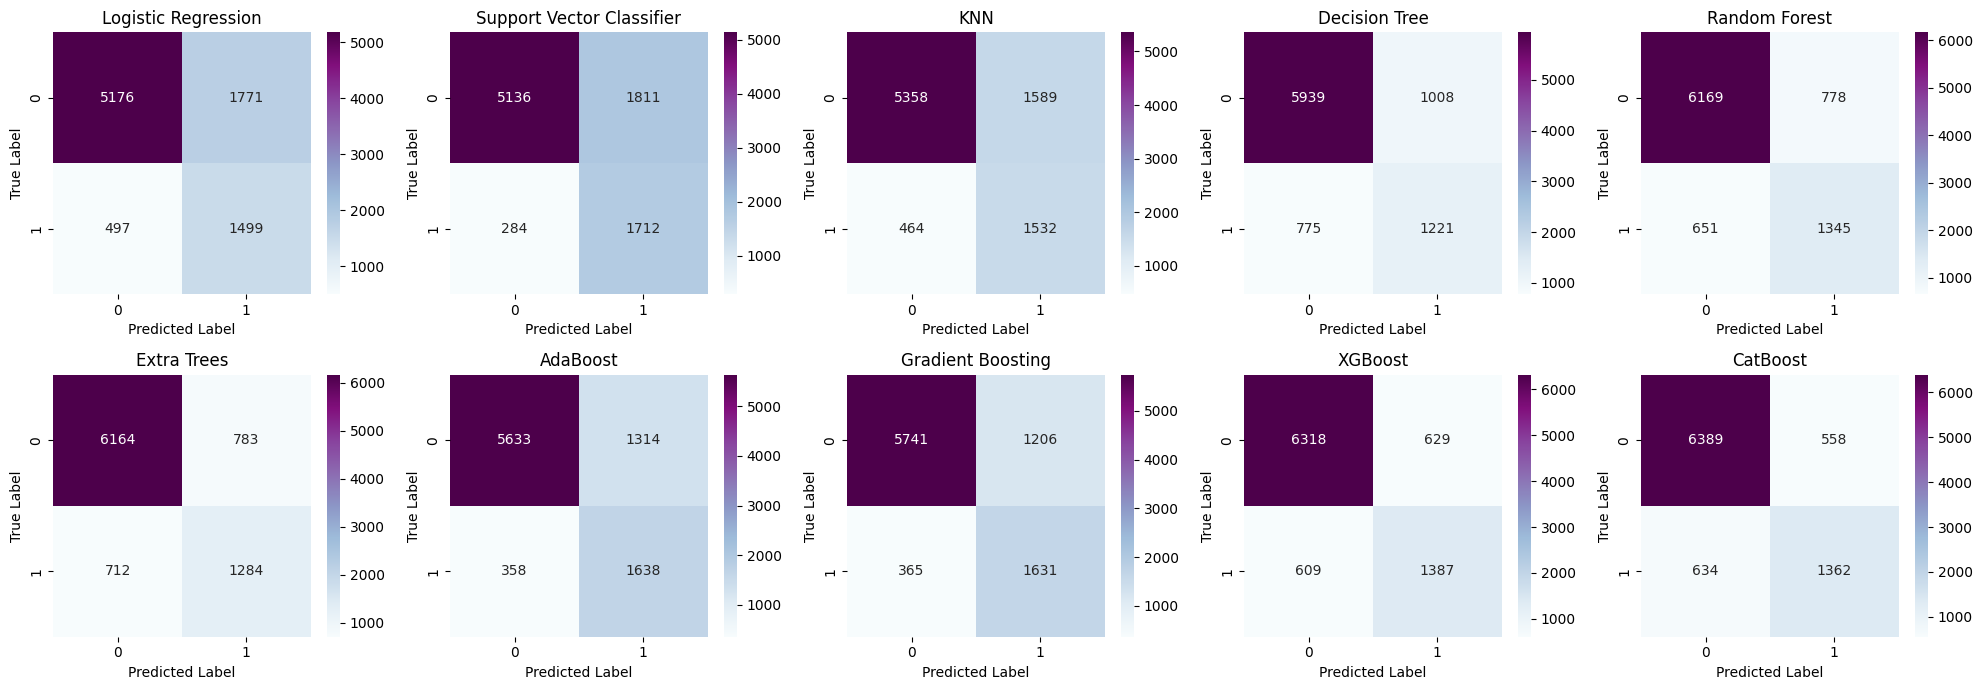

In [98]:
plt.figure(figsize=(20, 7))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(2, 5, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification reports

In [99]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      6947
           1       0.46      0.75      0.57      1996

    accuracy                           0.75      8943
   macro avg       0.69      0.75      0.69      8943
weighted avg       0.81      0.75      0.76      8943

------------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      6947
           1       0.49      0.86      0.62      1996

    accuracy                           0.77      8943
   macro avg       0.72      0.80      0.73      8943
weighted avg       0.84      0.77      0.78      8943

------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6947
           1       0.49      0.77      0.60      1996

    accura

For CatBoost model, both precision and recall values are also high along with the accuracy.

#### Using Cross Validation

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x1, y1, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

,Model,CV Accuracy,Accuracy,Difference
0,Logistic Regression,0.749152,0.746394,0.002758
9,CatBoost,0.885499,0.866711,0.018787
6,AdaBoost,0.832625,0.813038,0.019586
8,XGBoost,0.885406,0.861568,0.023838
7,Gradient Boosting,0.851534,0.824332,0.027202
1,Support Vector Classifier,0.803597,0.765739,0.037858
4,Random Forest,0.893795,0.841105,0.052690
3,Decision Tree,0.854712,0.799732,0.054981
5,Extra Trees,0.900304,0.831712,0.068592
2,KNN,0.848541,0.770435,0.078106


The least overfitting model is the Logistic Regression model. But it performs the worst on both test as well as validation data. So we need to discard it. The next least overfitting model is the CatBoost model that performs the best on both test and validation data.

#### Hyperparameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

##### CatBoost

In [108]:
params = {
    'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
    'iterations': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
    }

In [109]:
gcv = GridSearchCV(catboost.CatBoostClassifier(verbose=0), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E7232957E0>,
             param_grid={'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'iterations': [100, 110, 120, 130, 140, 150, 160, 170,
                                        180, 190, 200],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [105]:
best_params = gcv.best_params_
best_params

{'depth': 6, 'iterations': 150, 'learning_rate': 1}

In [106]:
model_cb = catboost.CatBoostClassifier(verbose=0, **best_params)
model_cb.fit(x1, y1)
y_pred_cb = model_cb.predict(x_test)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(accuracy_cb)

0.8538521748853852


The accuracy is 85.39%

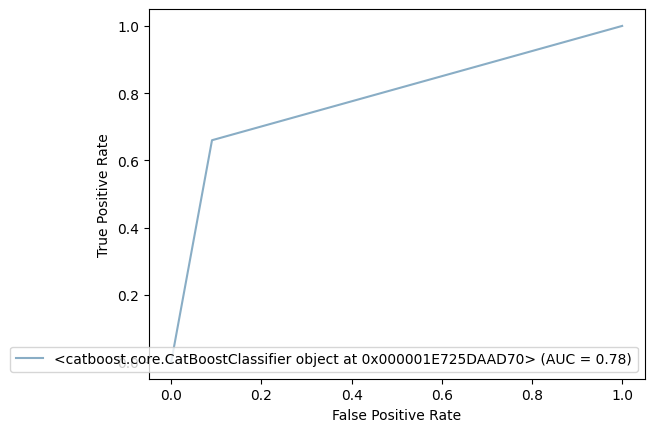

In [107]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cb)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_cb)
display.plot()
plt.show()

The AUC value is 0.78

### Saving the model

In [110]:
import pickle

In [111]:
filename = 'census_model.pkl'
pickle.dump(model_cb, open(filename, 'wb'))

#### Predicting using the saved model

In [112]:
model = pickle.load(open(filename, 'rb'))

pred = model.predict(x_test)

In [113]:
test_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
test_df

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,0
...,...,...
8938,0,0
8939,0,0
8940,1,1
8941,0,0


These are the final predictions.

In [114]:
test_df.to_csv('census_income_predictions.csv')